#Importings##


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, auc, roc_curve, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CSAI 253 Data Sets/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EDA & Feature Enginering     

#####Youssef Tarek

In [ ]:
print("\nDataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

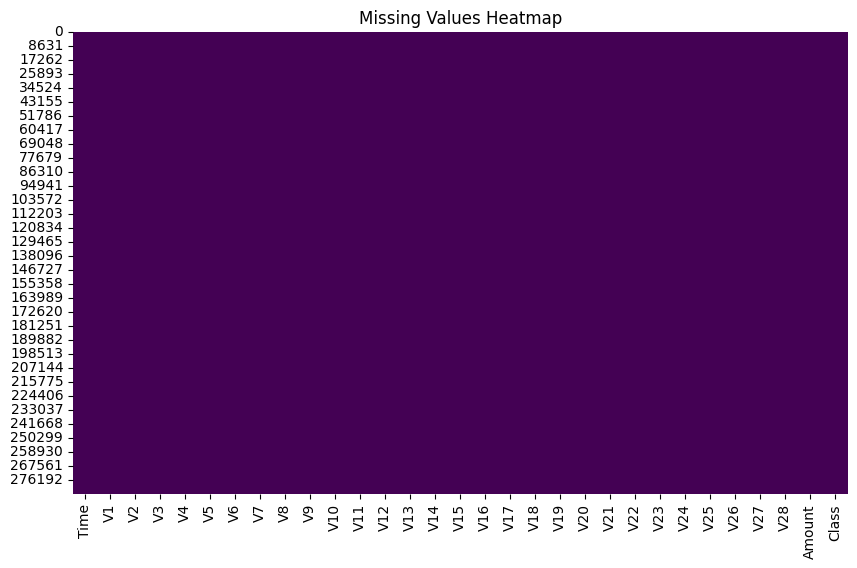

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:

target_column = 'Class'
class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-20-ba61517441f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


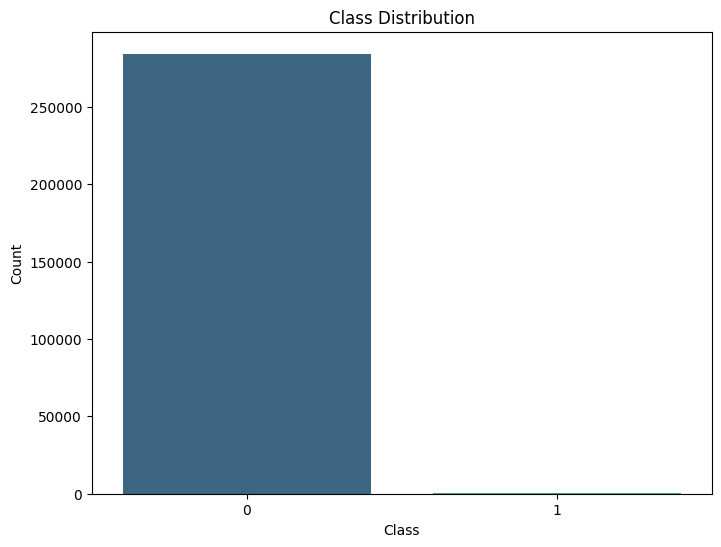

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
features = data.columns[:-1]
outliers = {}
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"Outliers in {feature}:")
    print(outliers[feature])

Outliers in Time:
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
Outliers in V1:
            Time         V1         V2        V3        V4        V5  \
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
85          55.0  -4.575093  -4.429184  3.402585  0.903915  3.002224   
140         87.0  -5.101877   1.897022 -3.458034 -1.277543 -5.517758   
146         92.0  -5.285971   4.847323 -1.290368 -1.427842 -0.621533   
164        103.0  -6.093248 -12.114213 -5.694973  3.294389 -1.413792   
...          ...        ...        ...       ...       ...       ...   
284631  172623.0  -5.459612   4.844512 -5.127471 -0.772816 -2.098147   
284649  172642.0 -11.946976   9.772660 -8.006237 -2.498596 -4.229520   
284772  172760.0  -6.713826   2.369104 -3.534768 -0.368259 -1.721030   
284795  172778.0 -12.516732  10.187

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


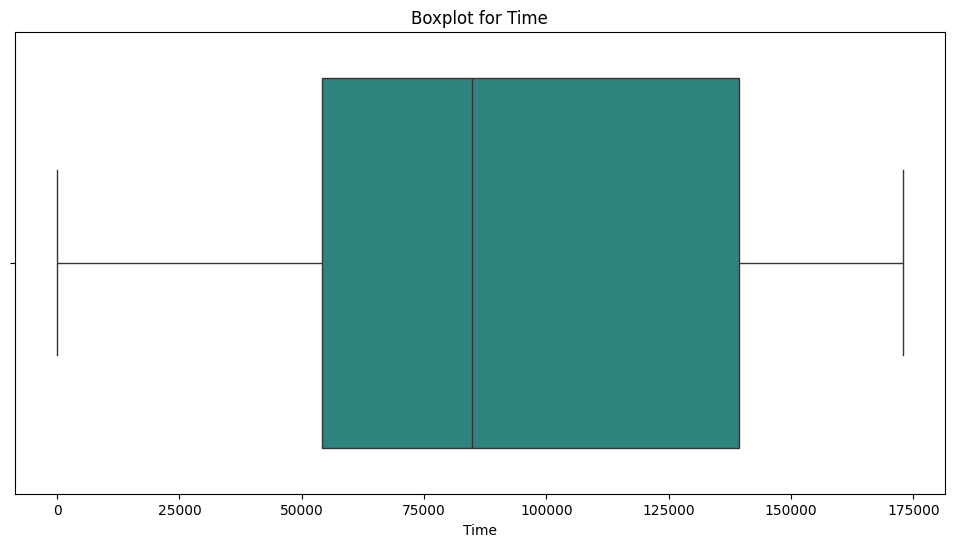

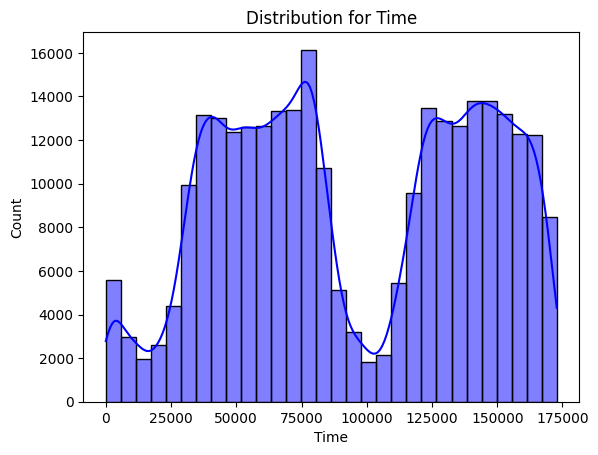

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


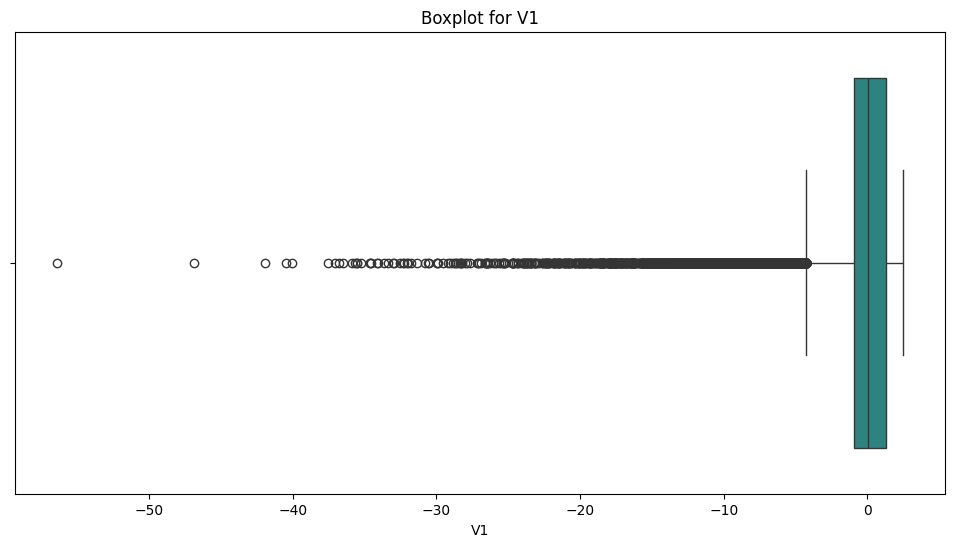

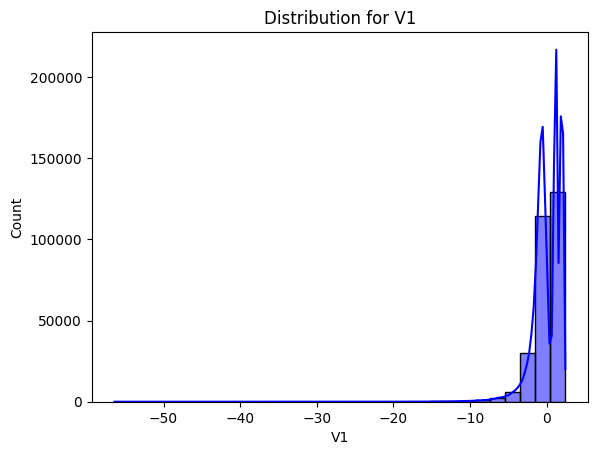

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


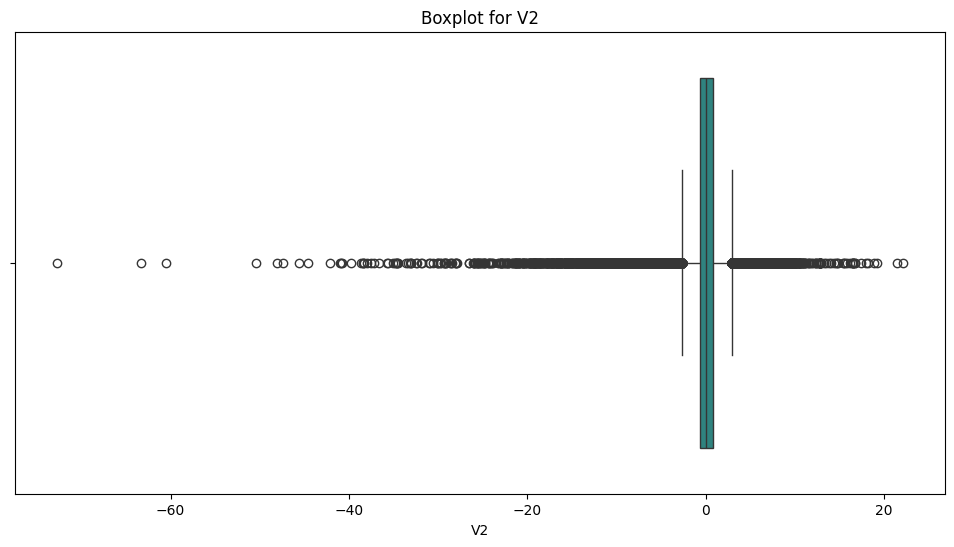

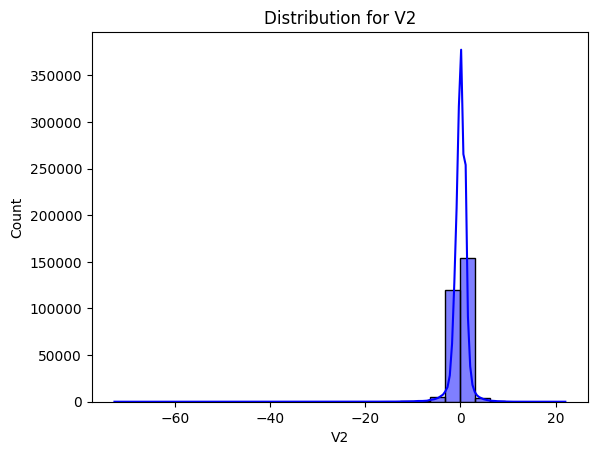

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


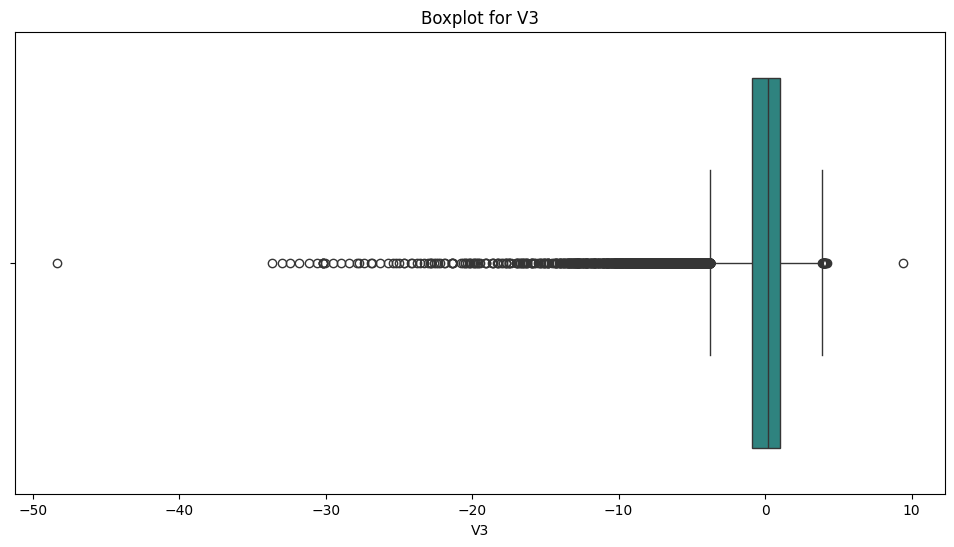

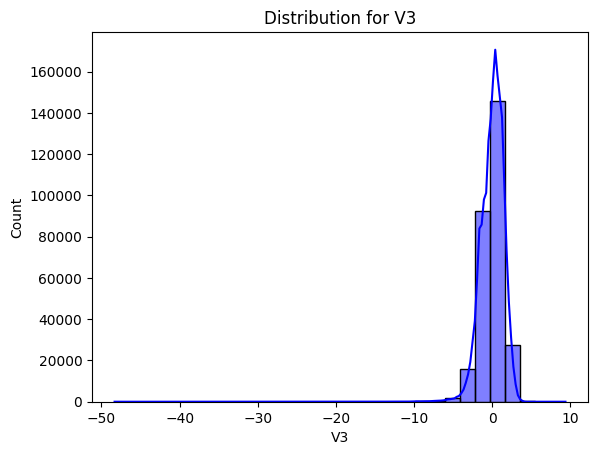

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


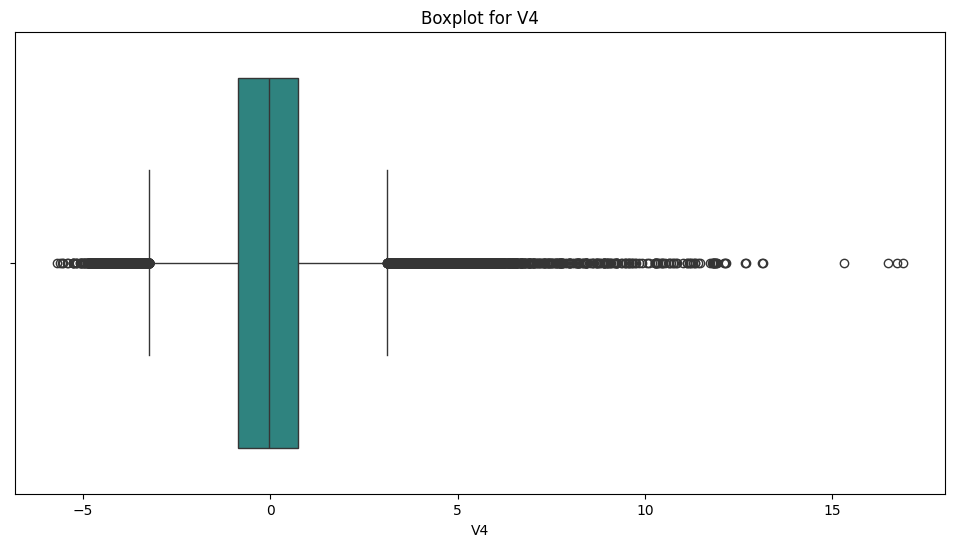

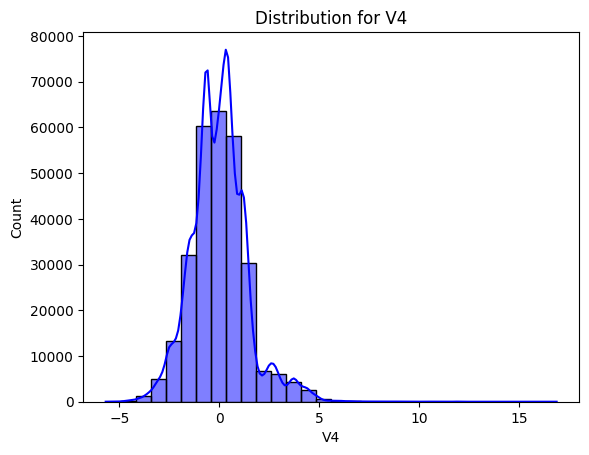

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


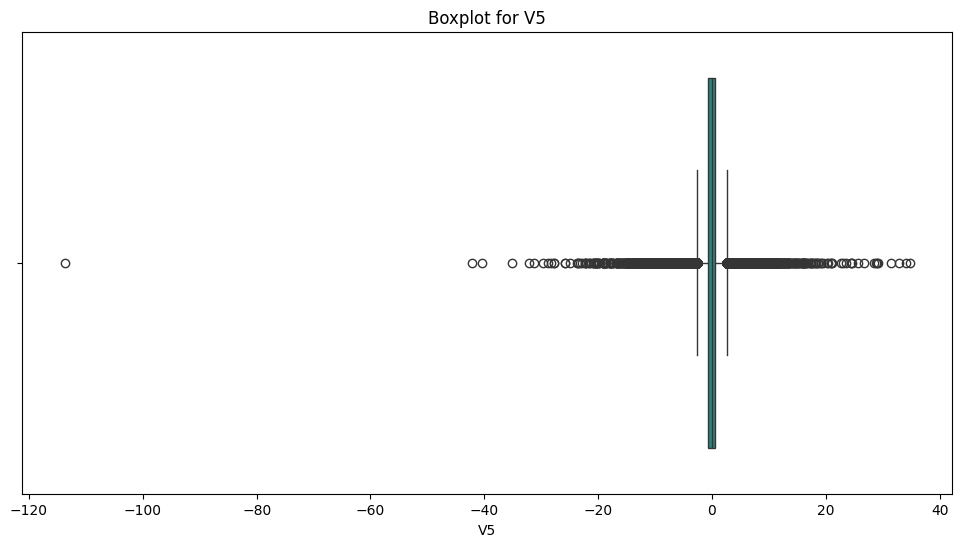

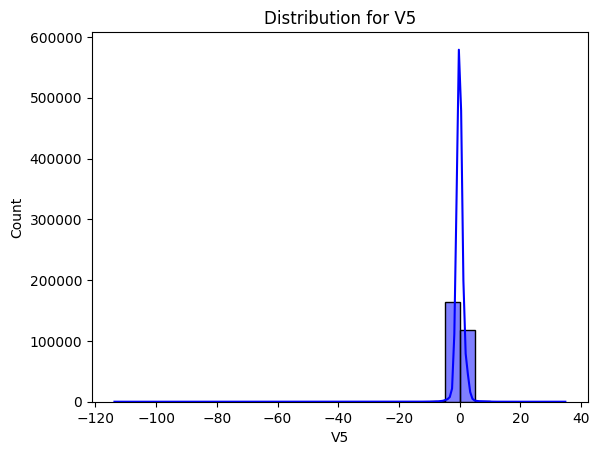

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


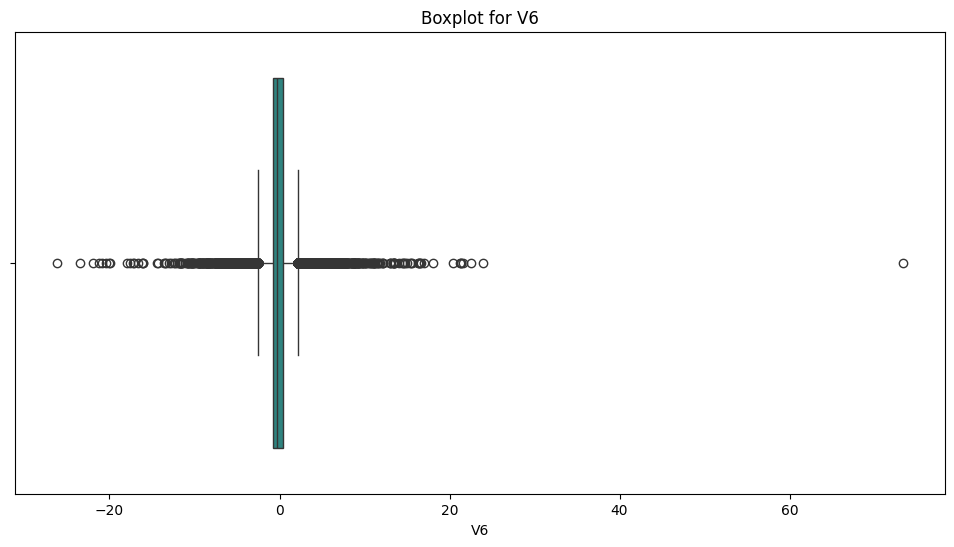

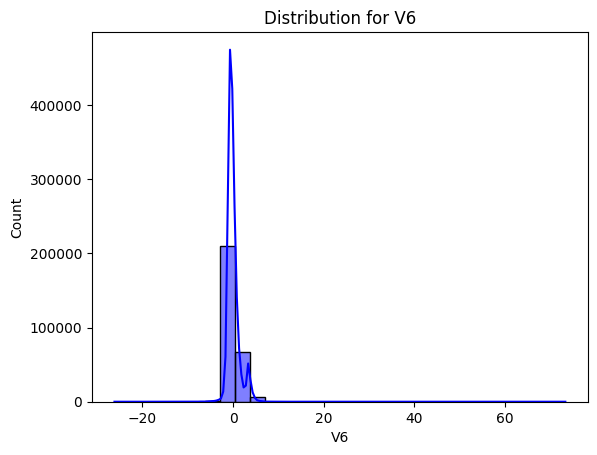

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


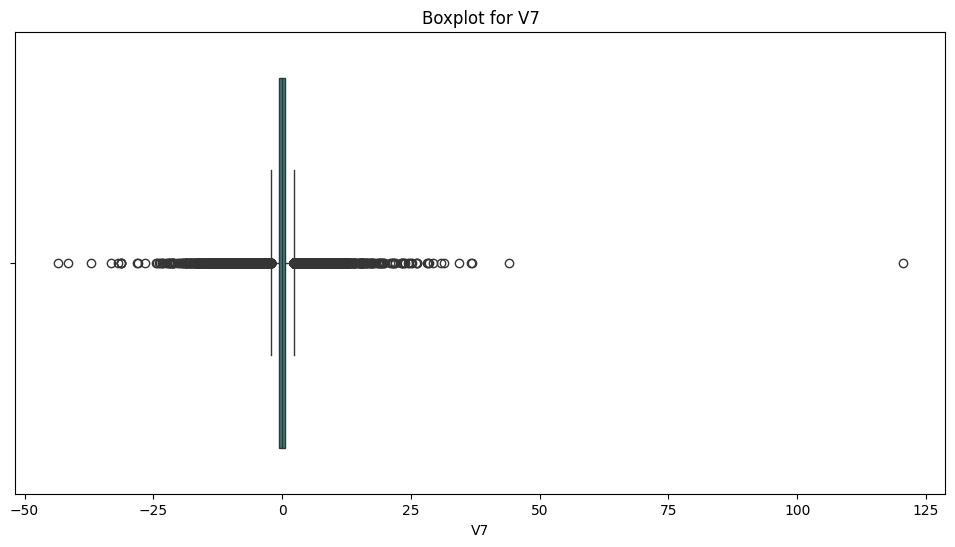

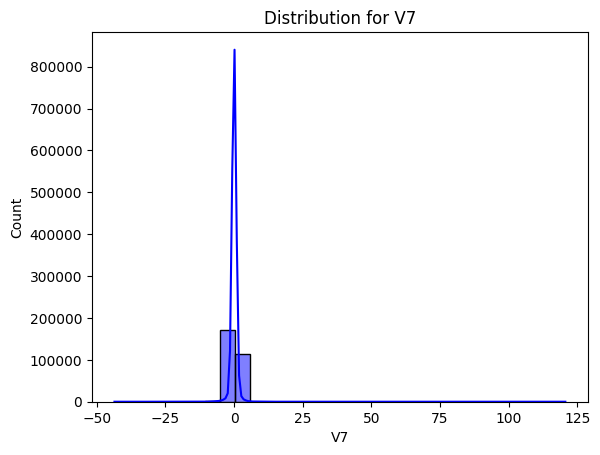

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


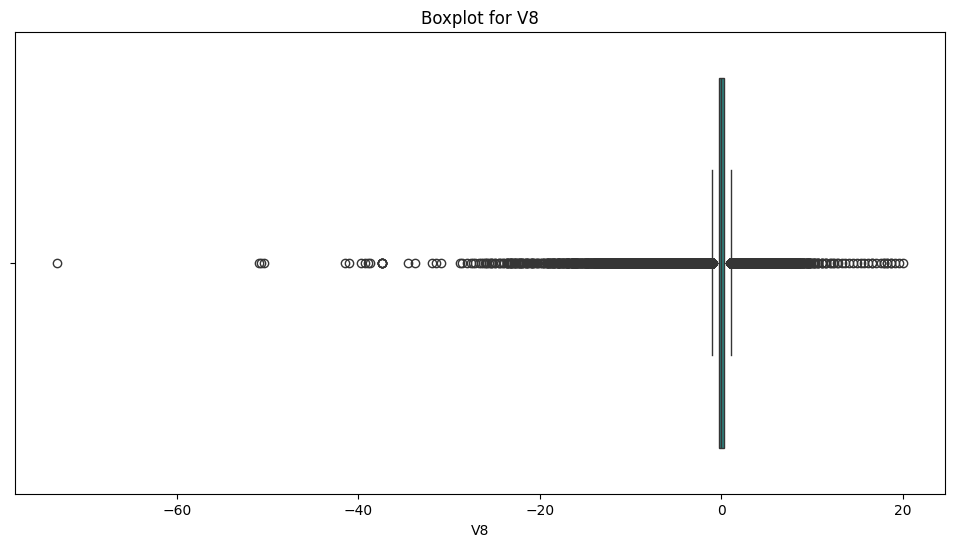

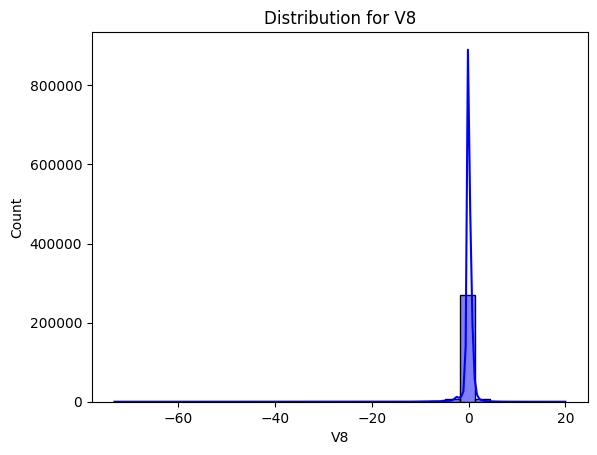

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


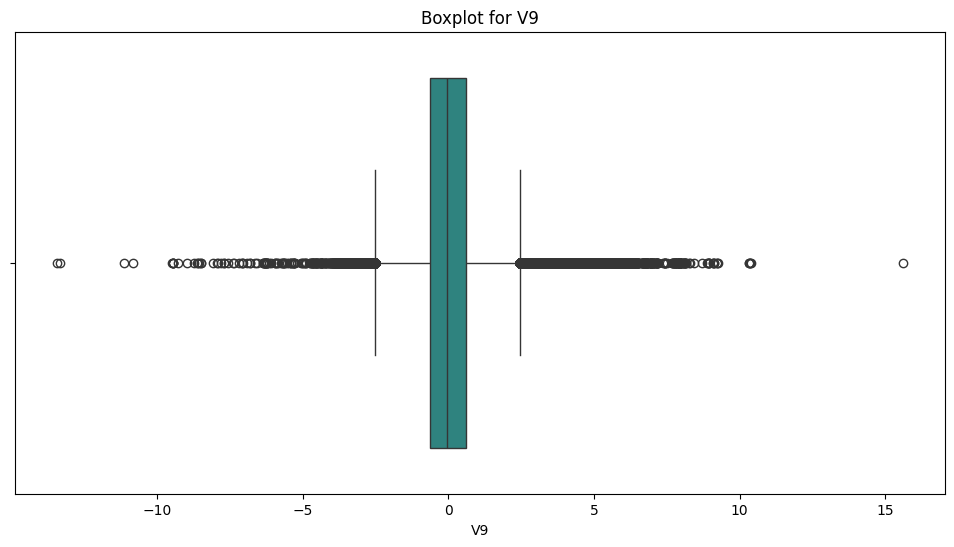

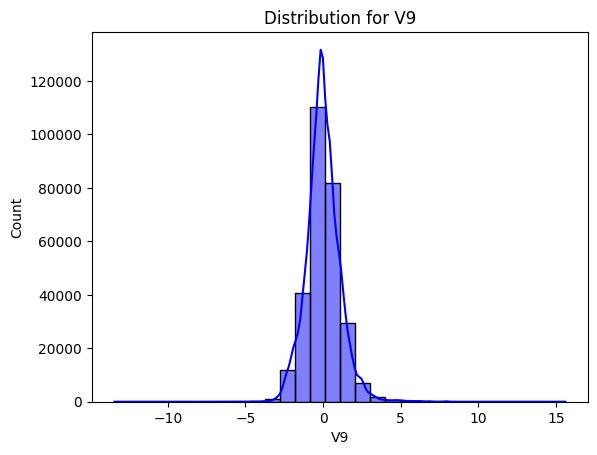

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


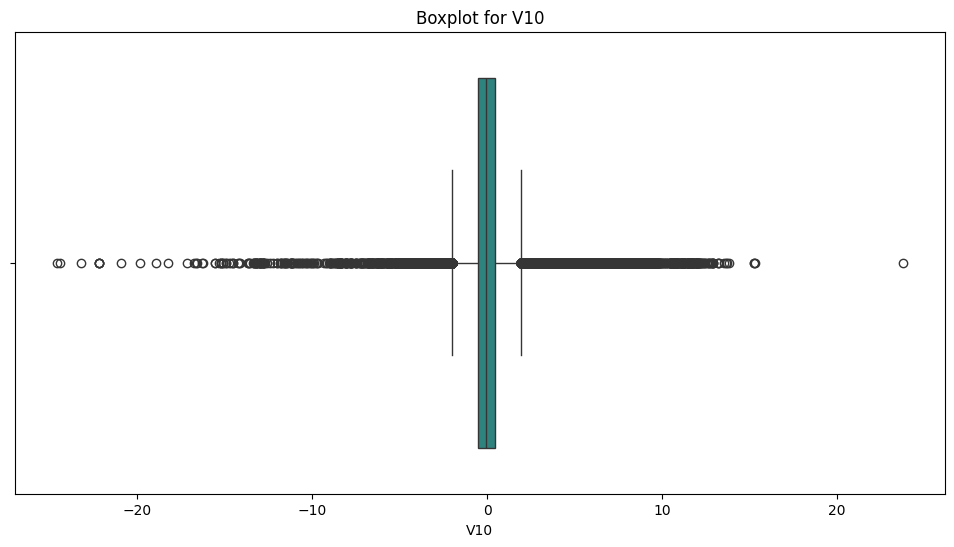

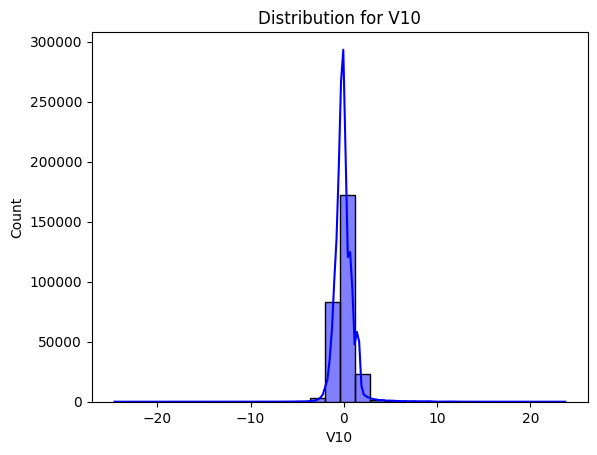

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


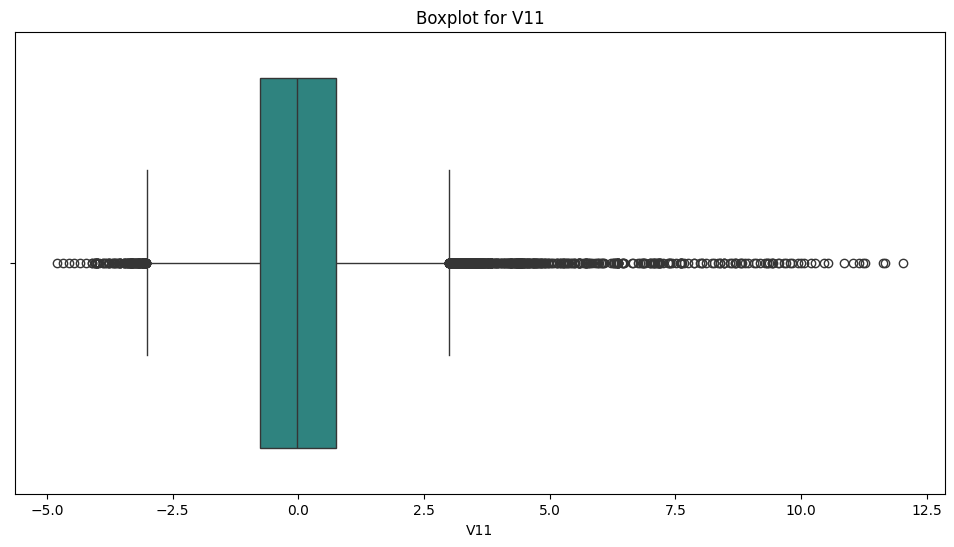

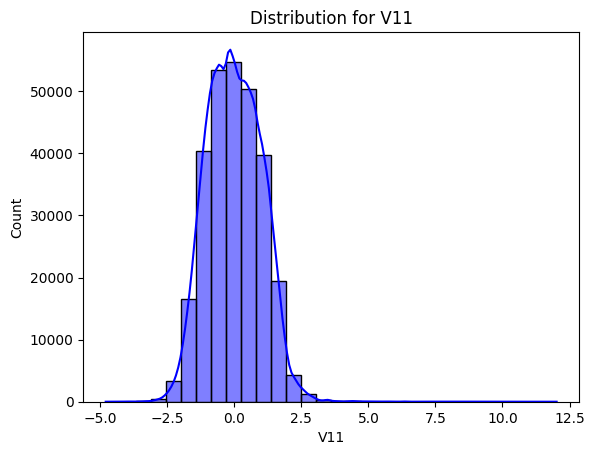

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


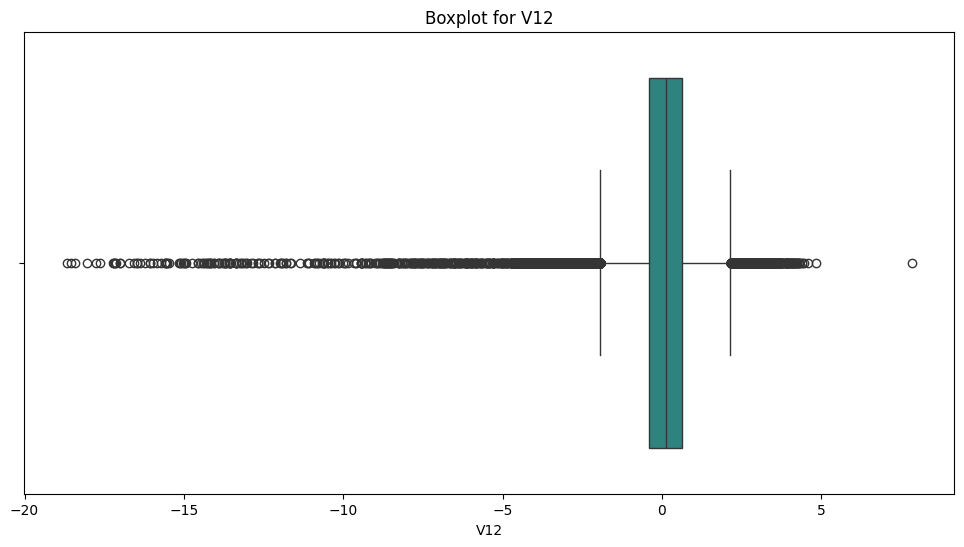

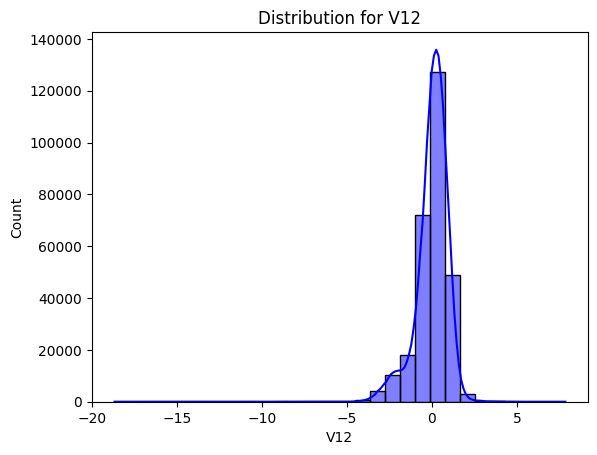

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


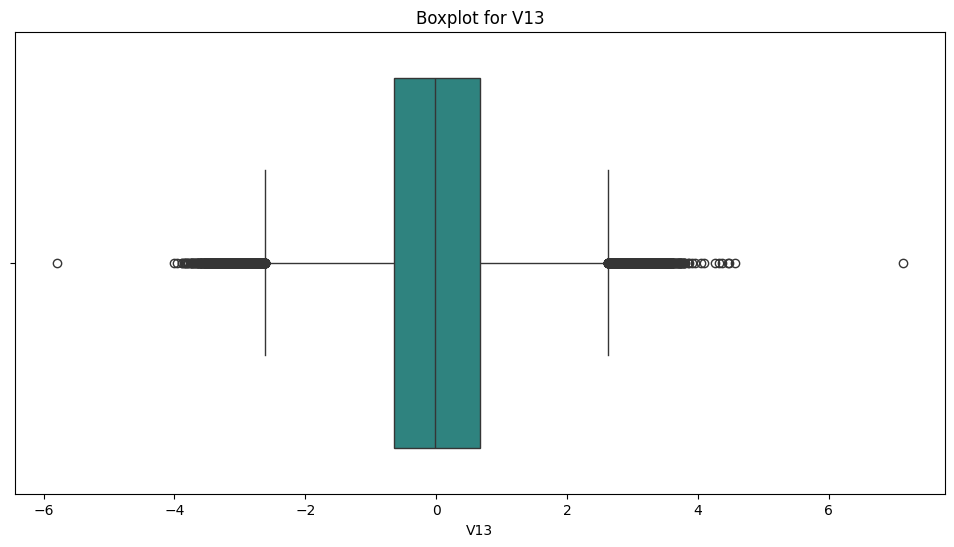

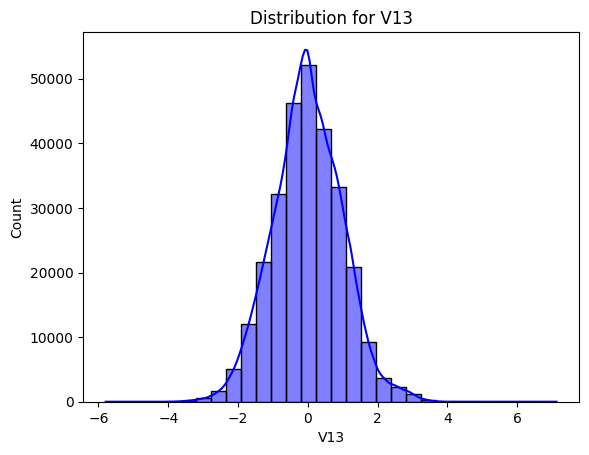

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


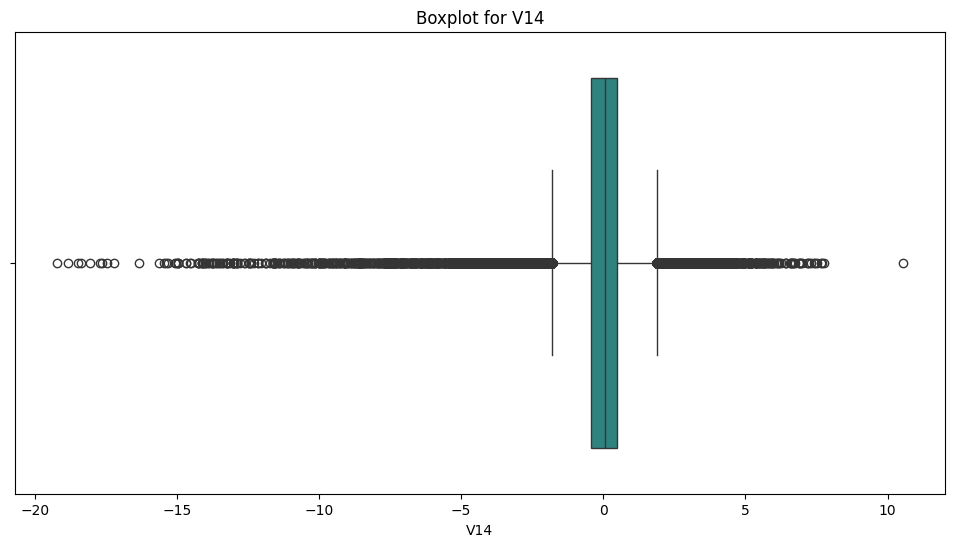

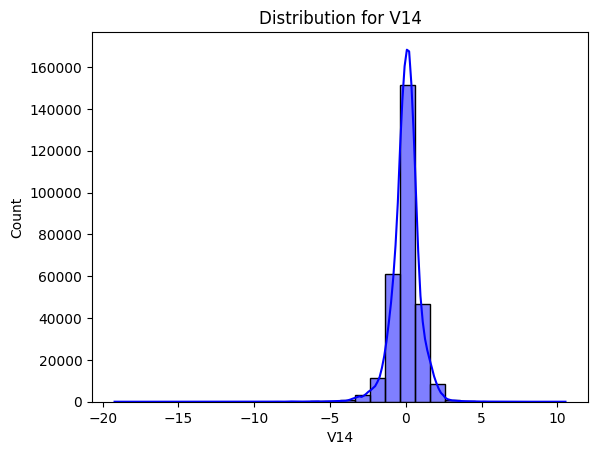

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


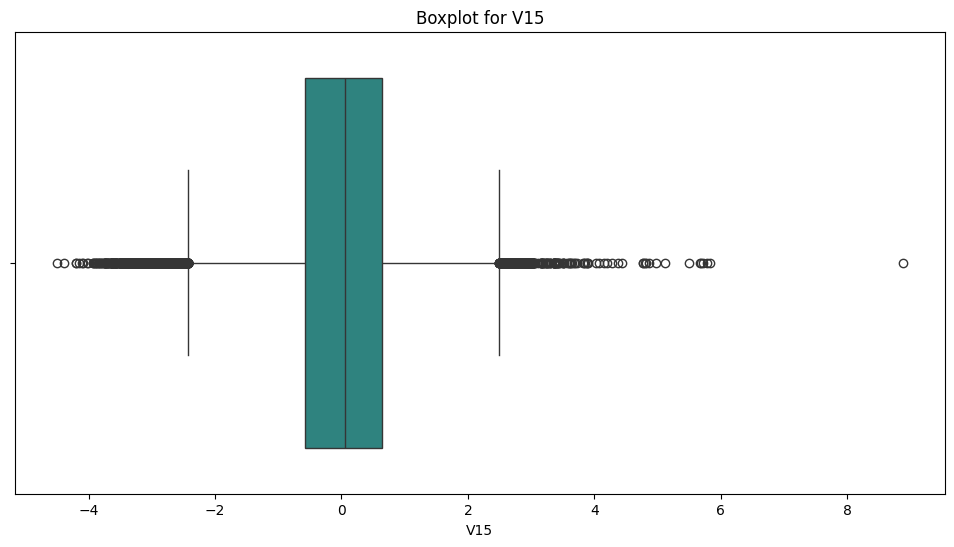

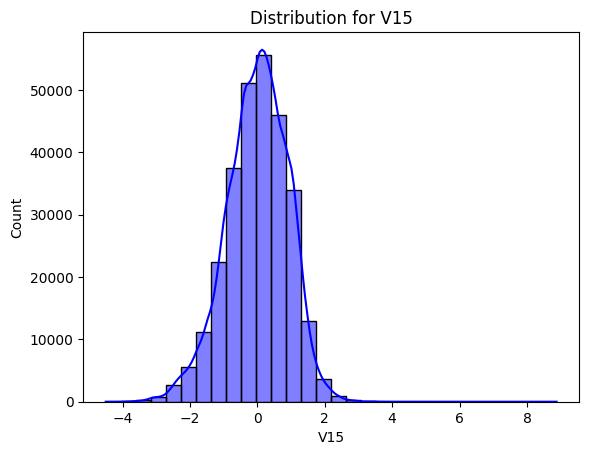

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


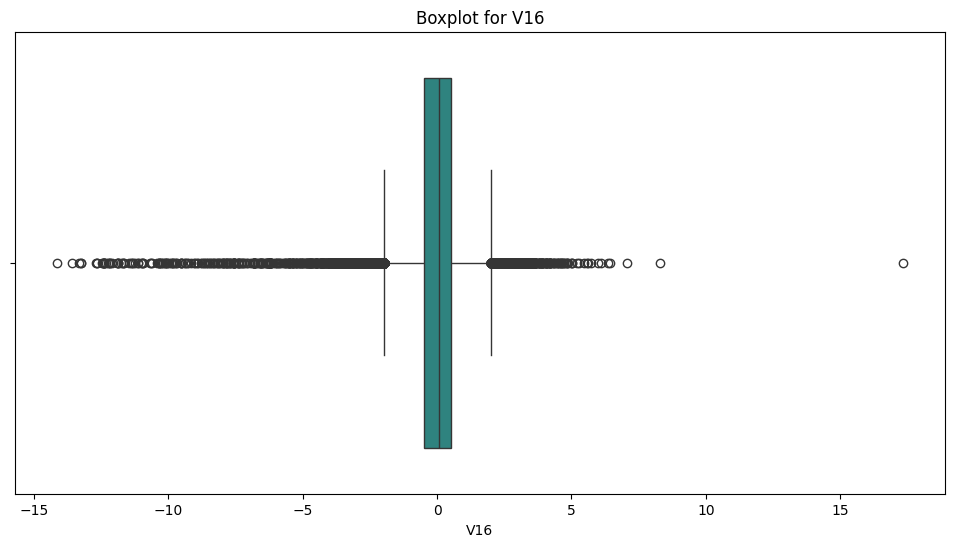

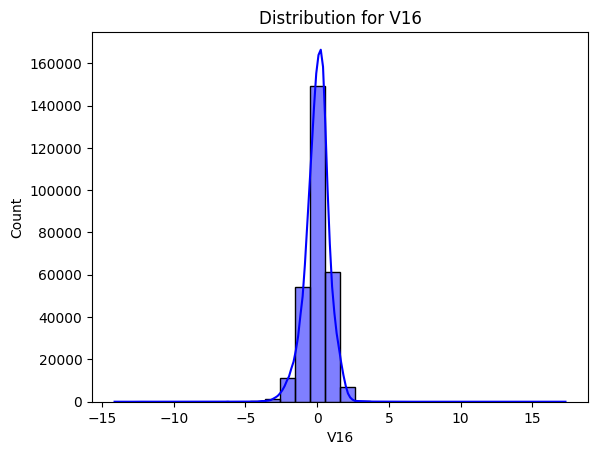

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


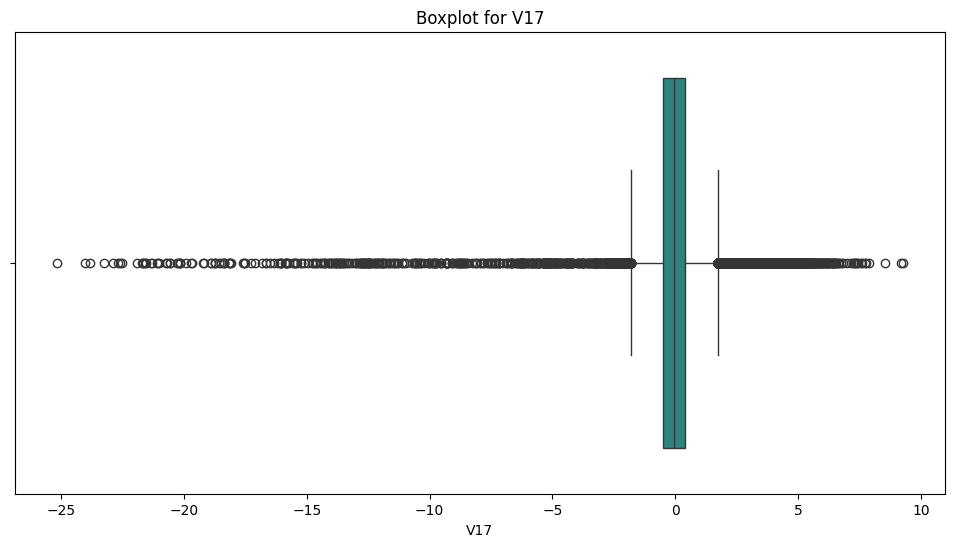

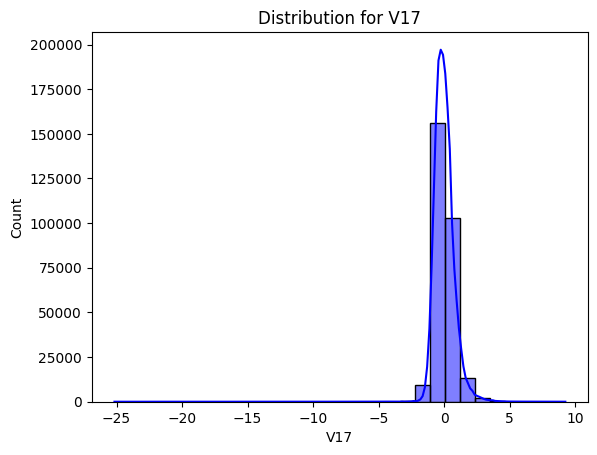

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


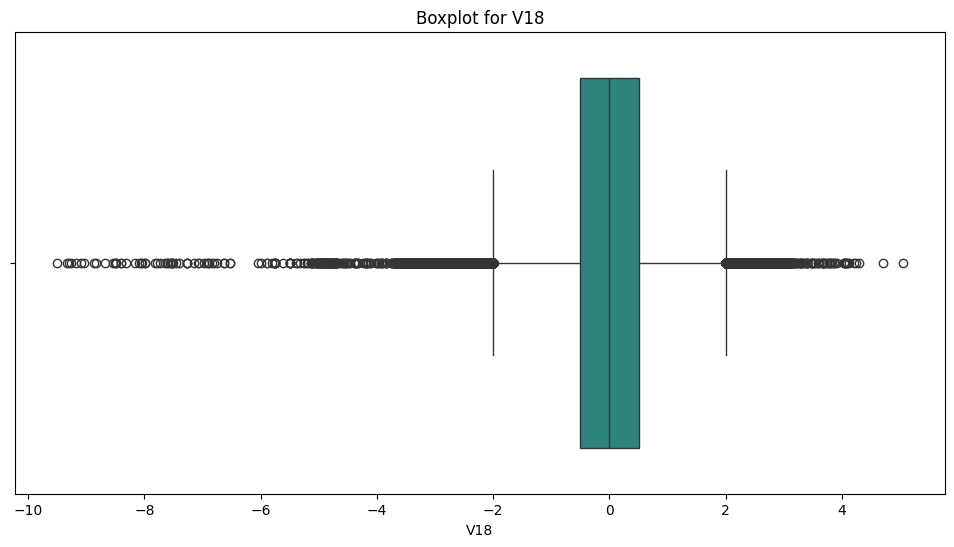

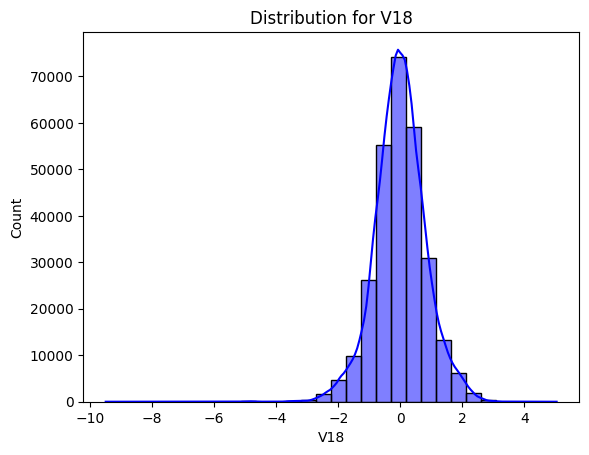

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


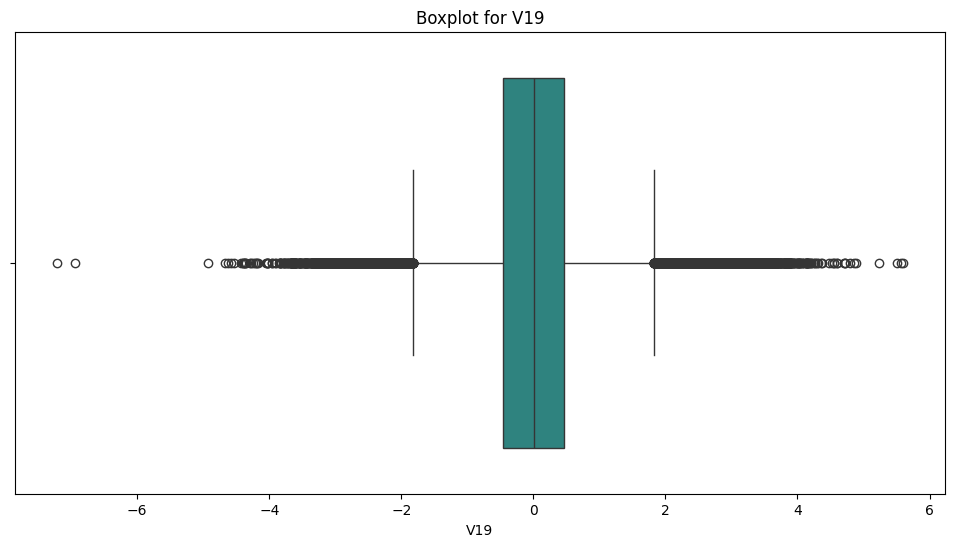

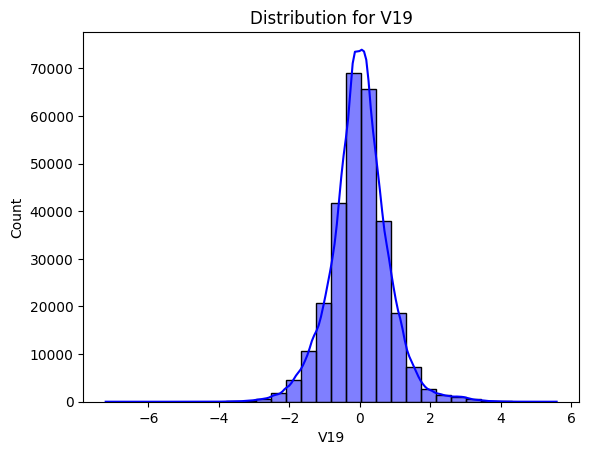

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


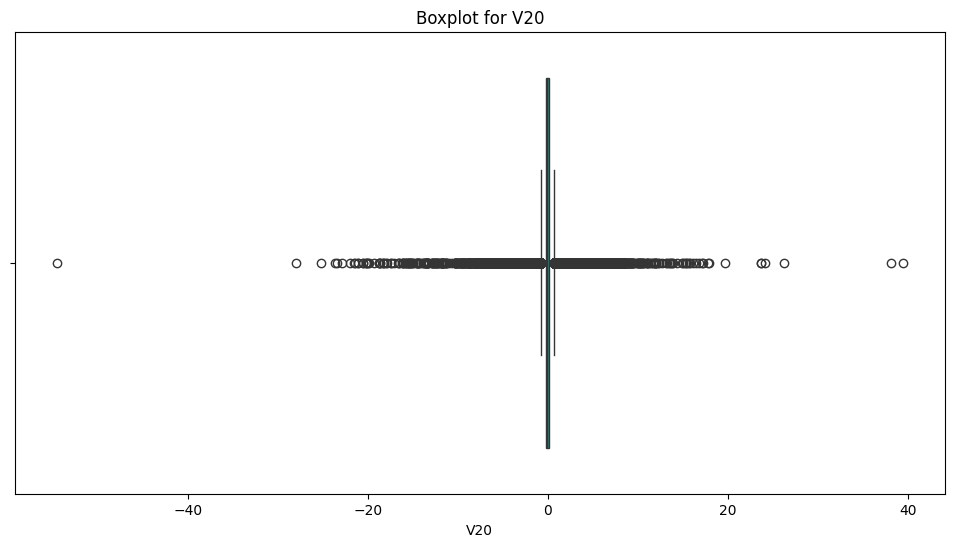

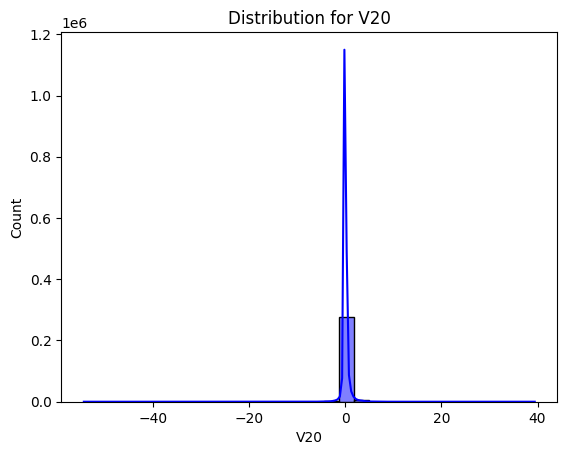

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


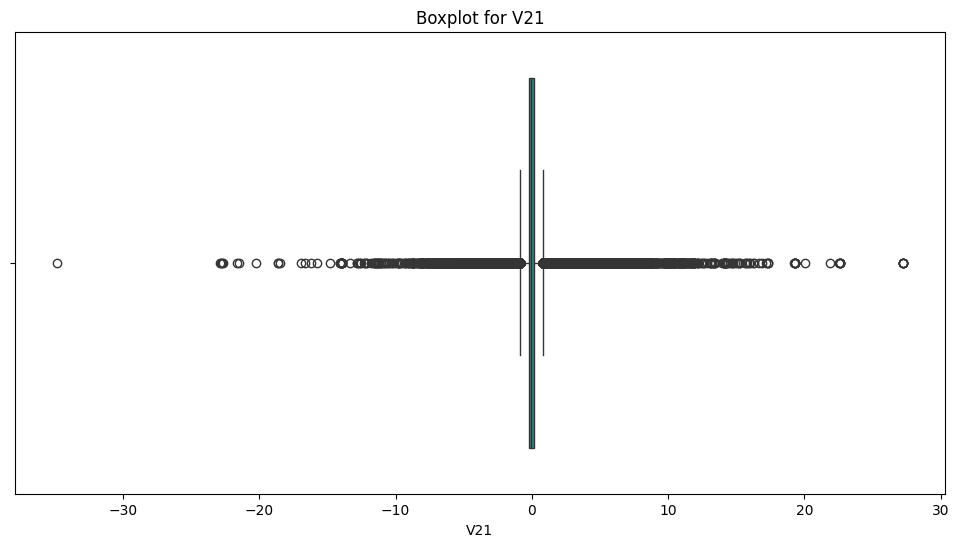

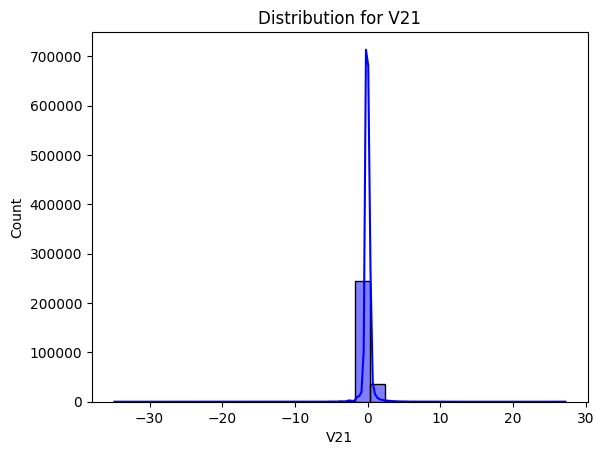

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


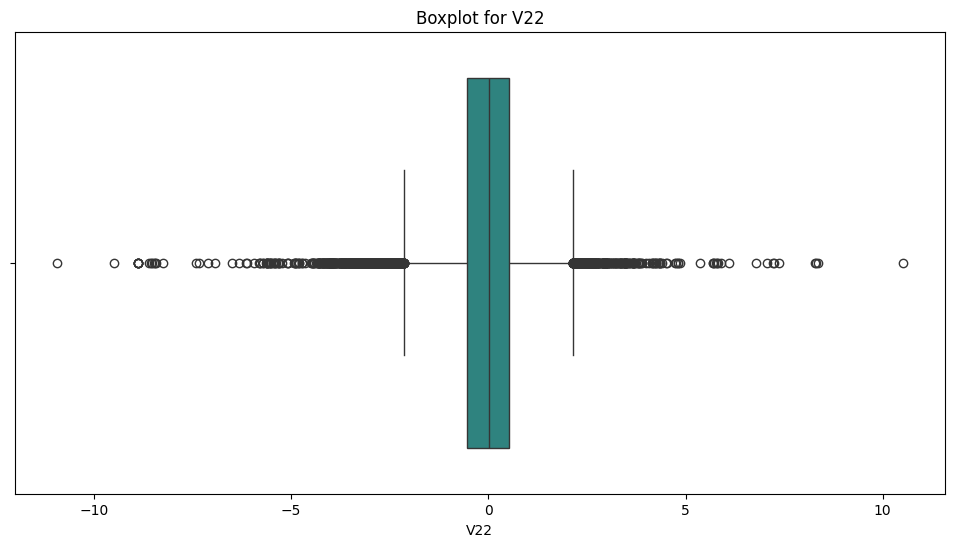

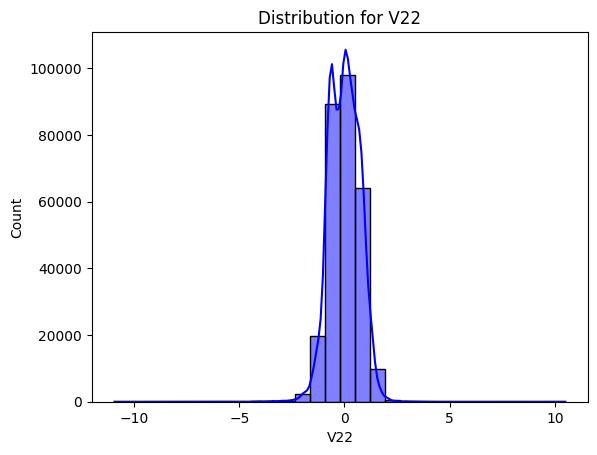

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


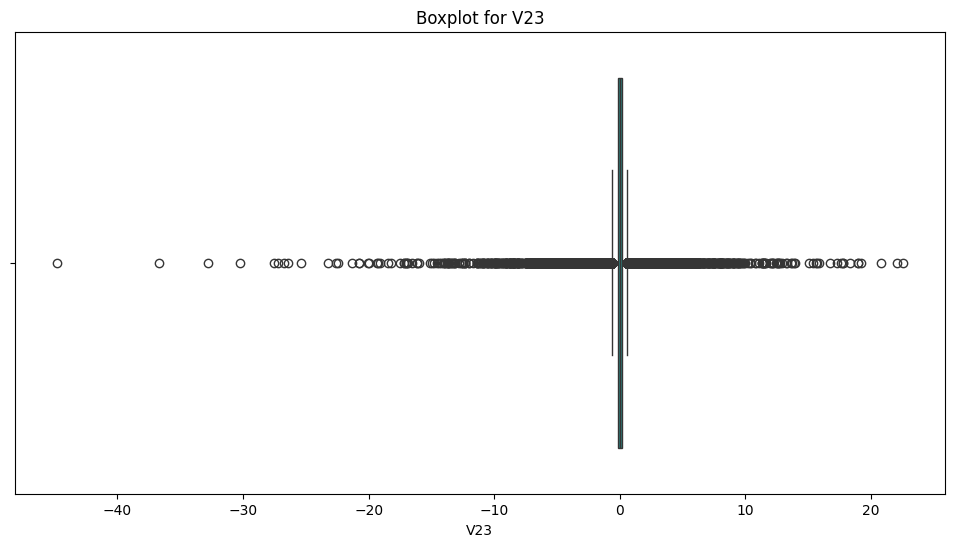

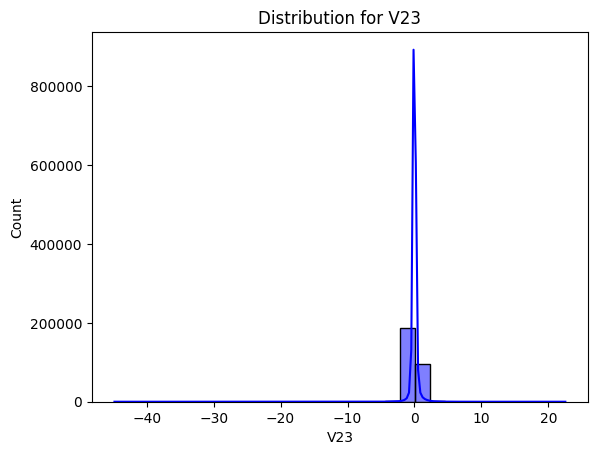

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


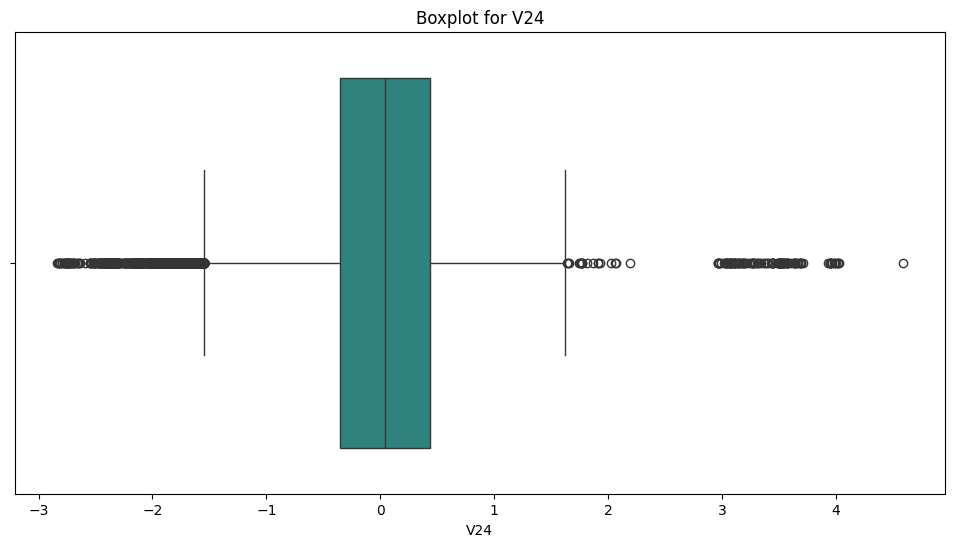

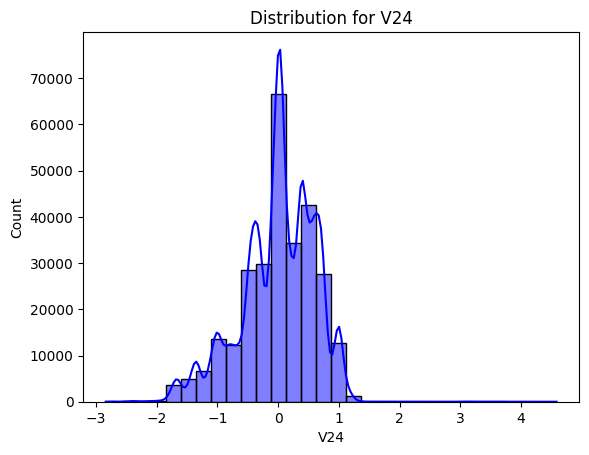

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


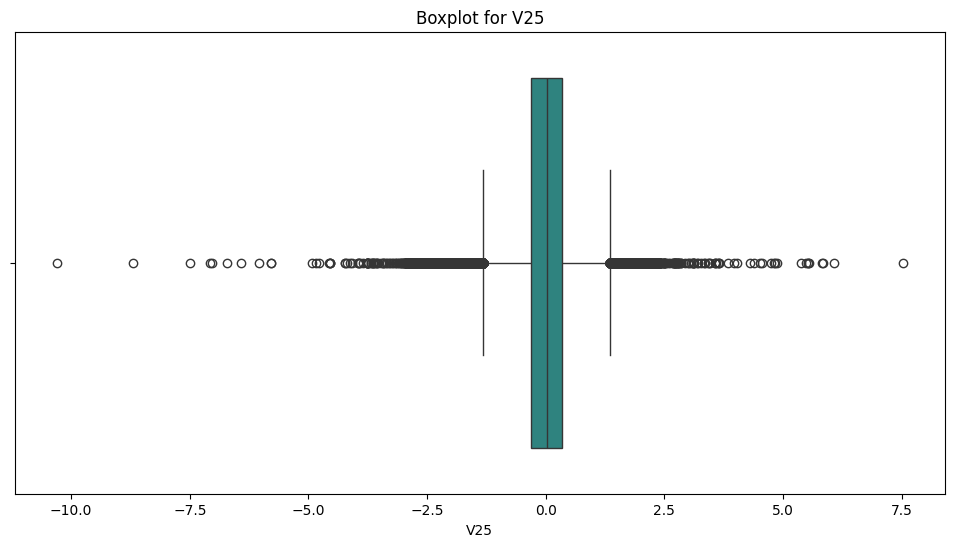

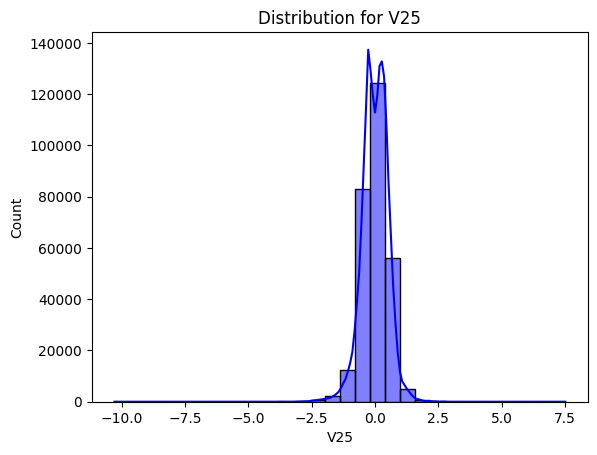

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


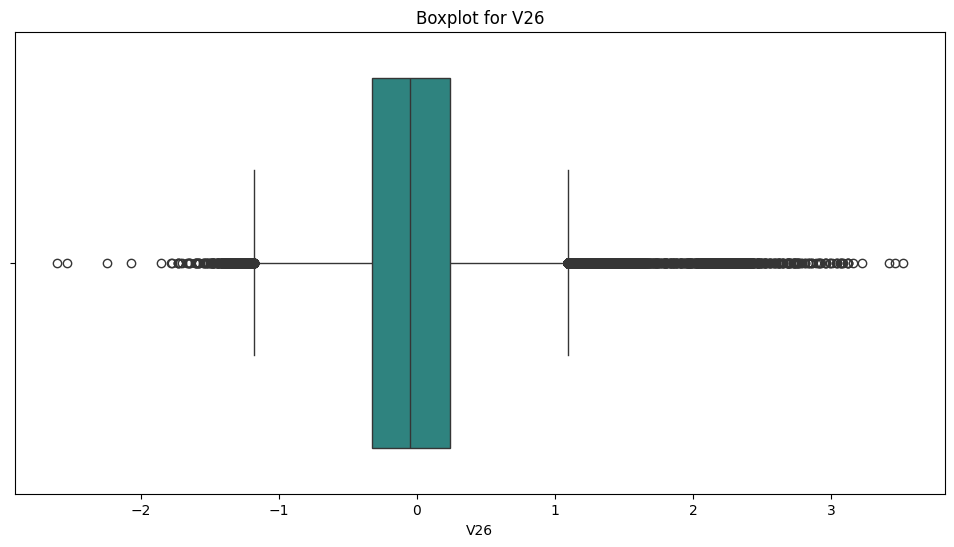

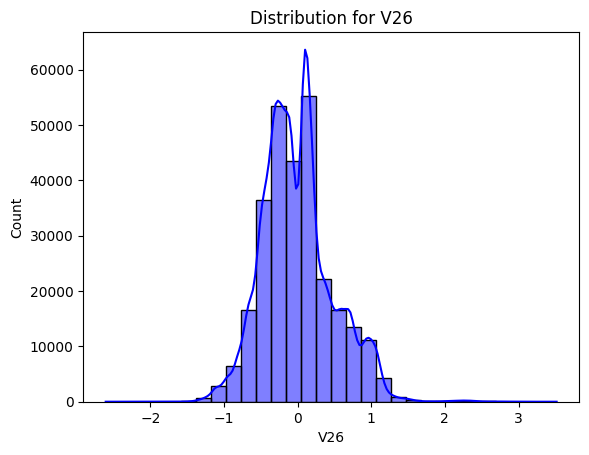

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


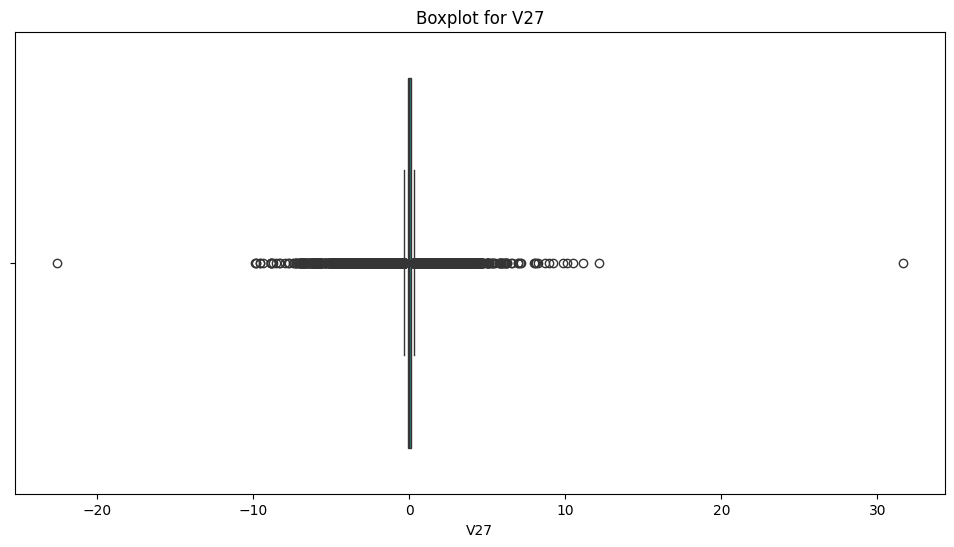

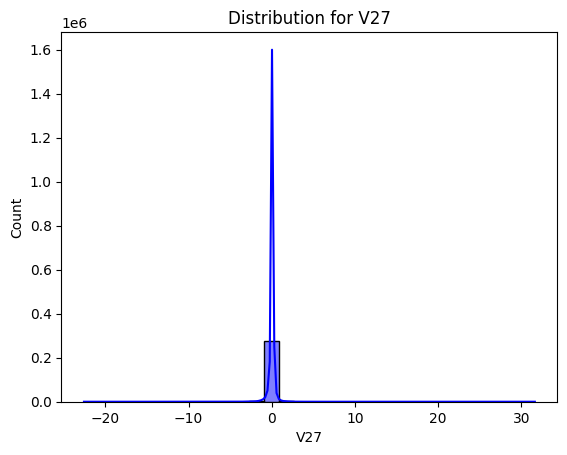

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


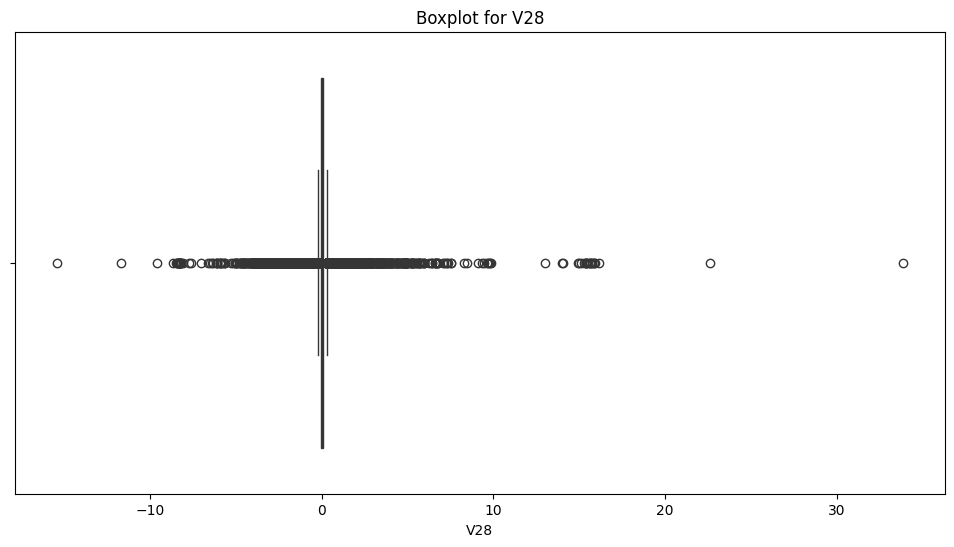

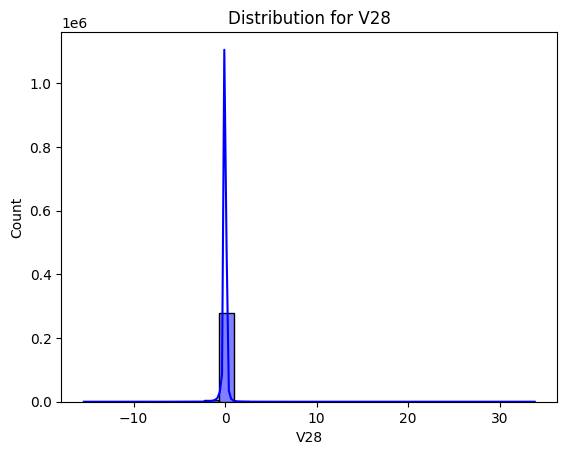

<ipython-input-22-d4cb69f6d4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='viridis')


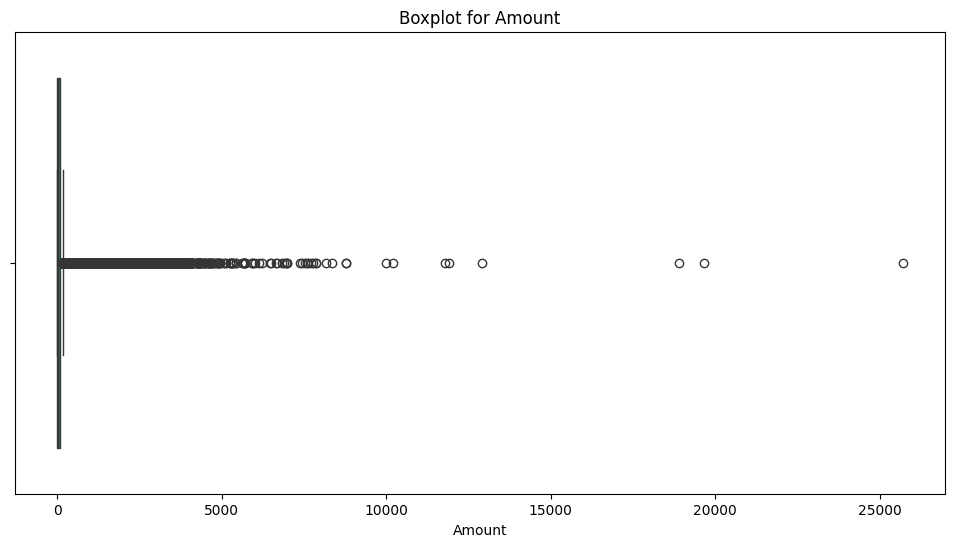

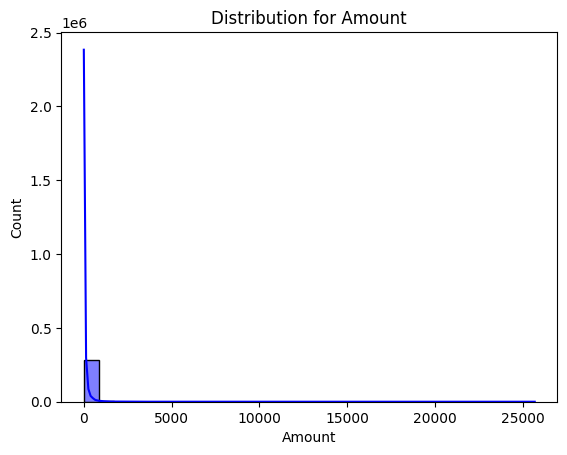

In [ ]:
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=feature, palette='viridis')
    plt.title(f'Boxplot for {feature}')
    plt.show()

    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution for {feature}')
    plt.show()

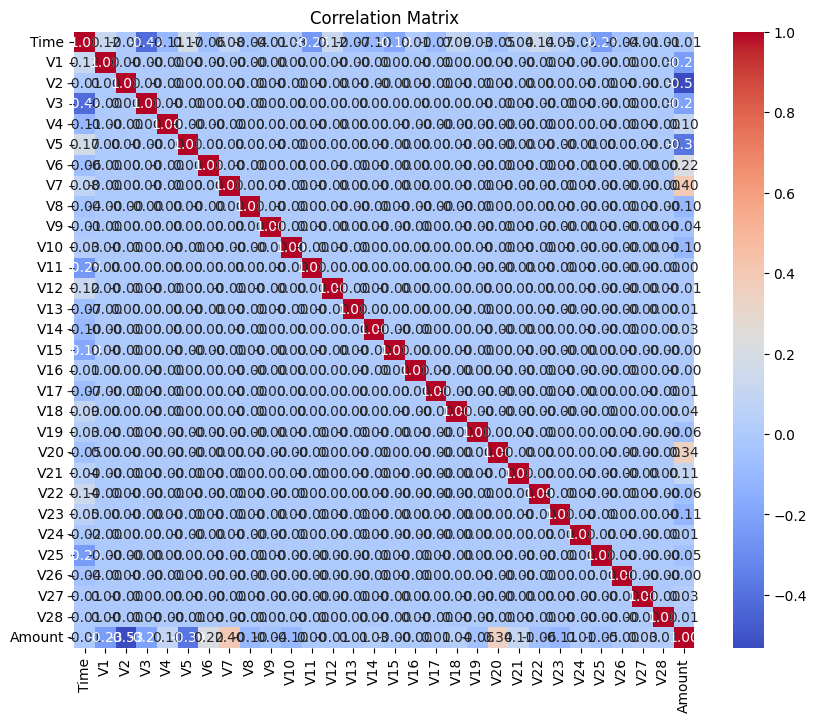

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


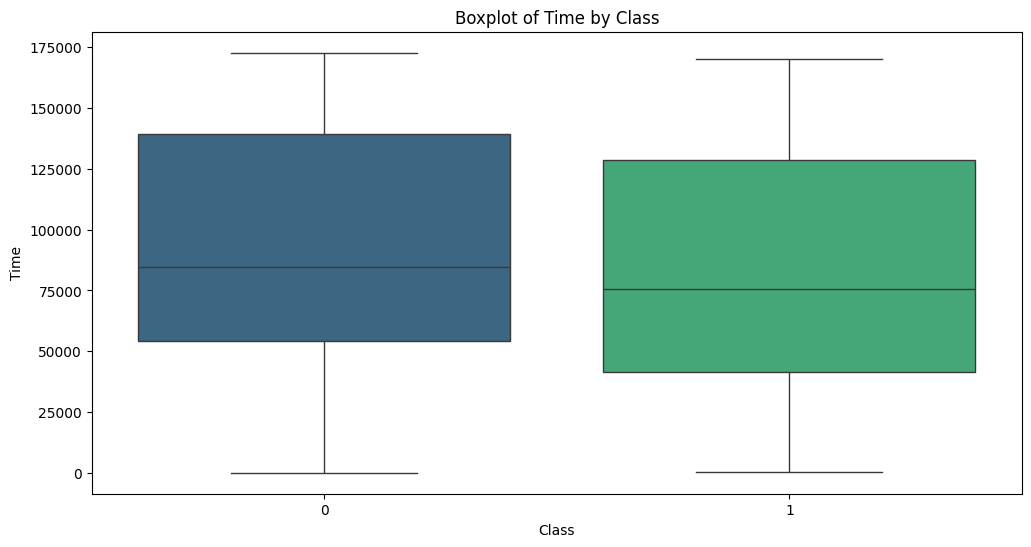

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


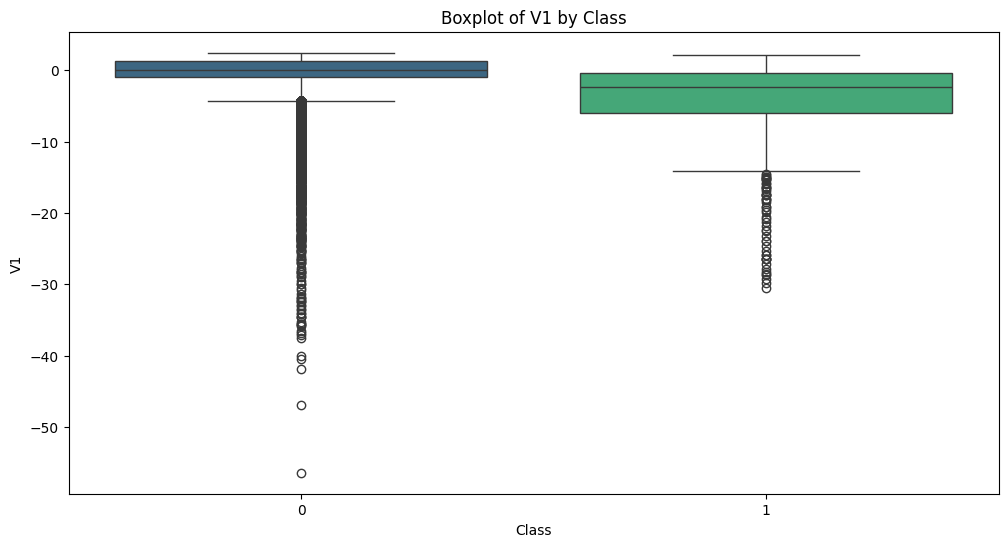

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


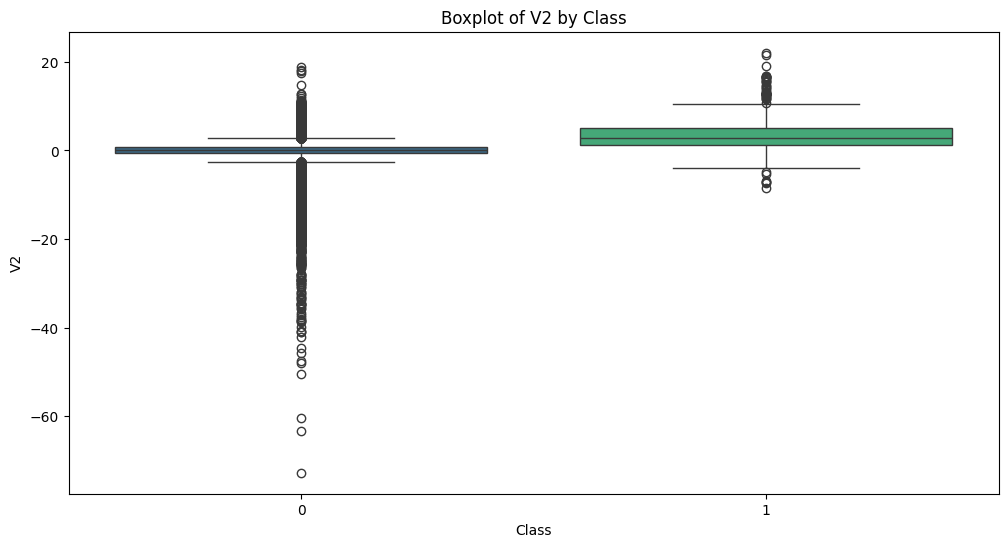

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


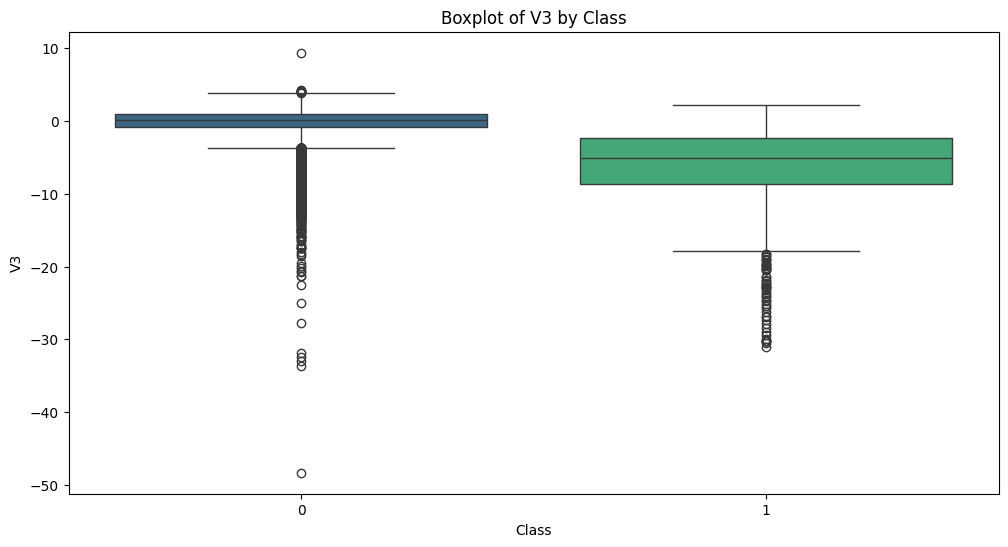

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


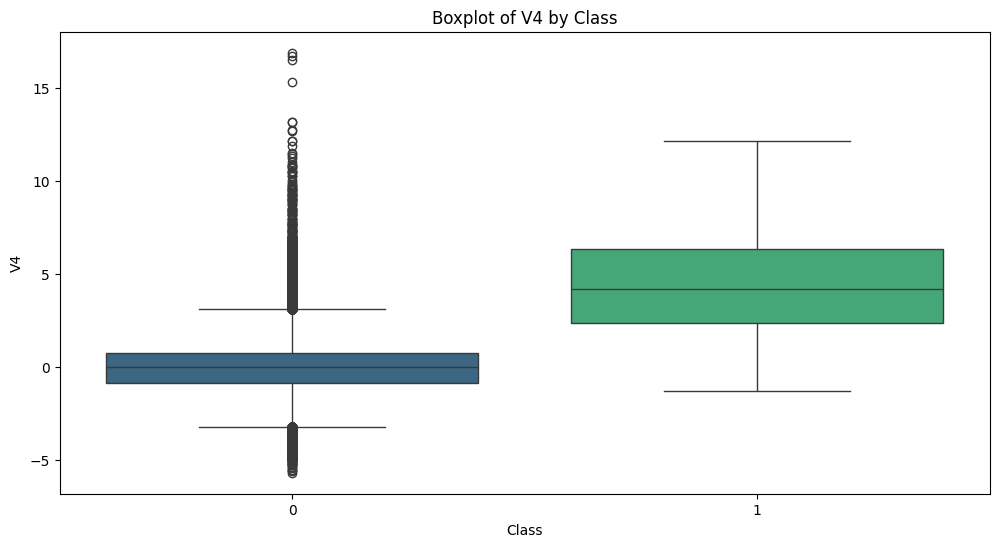

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


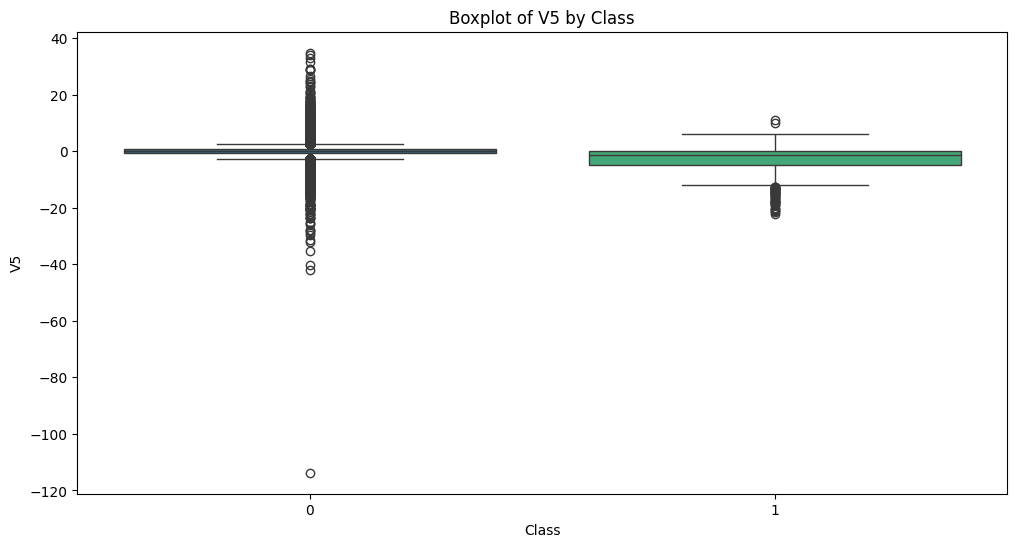

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


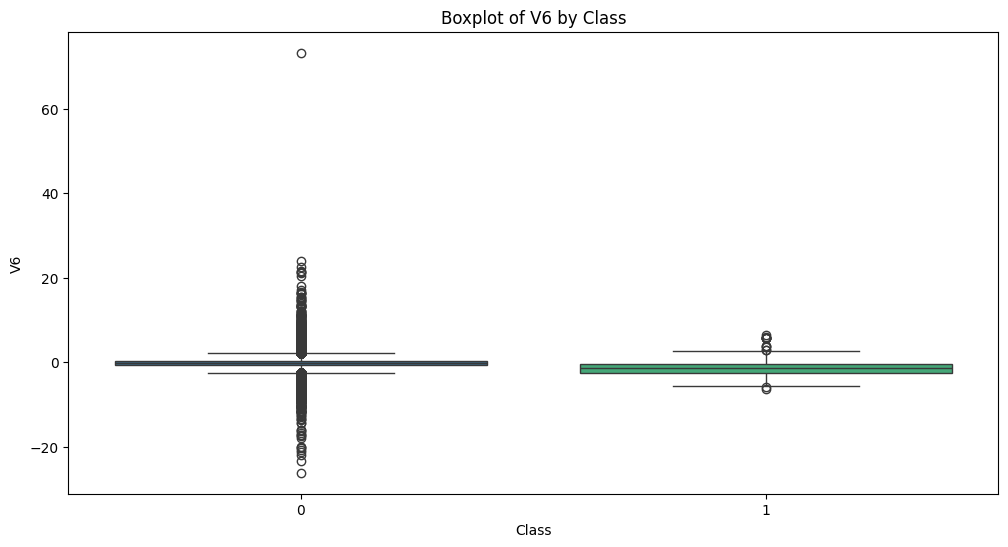

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


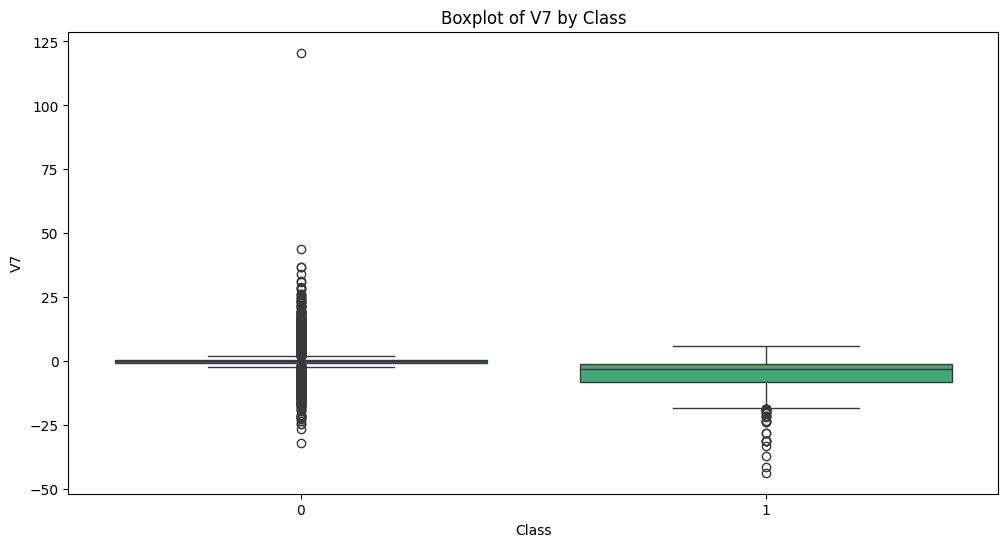

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


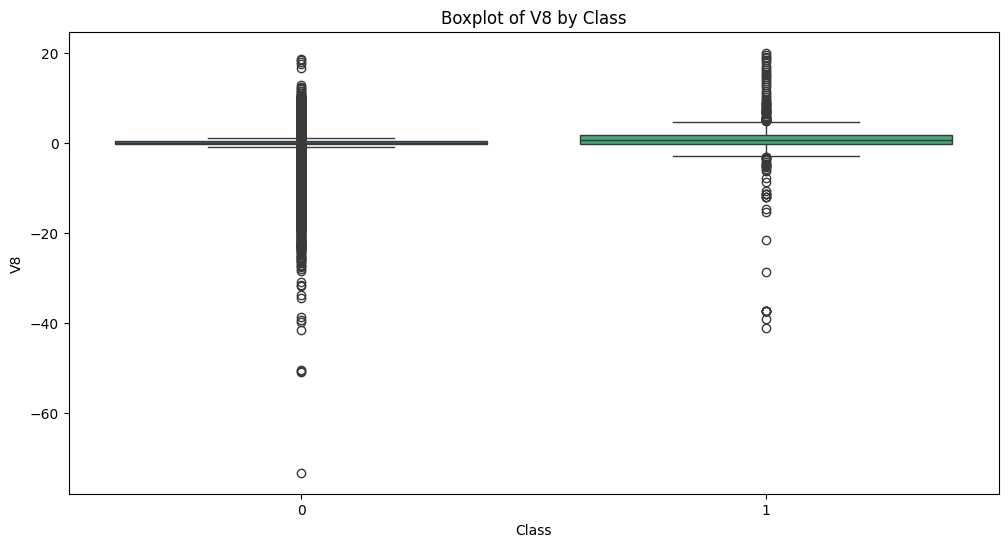

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


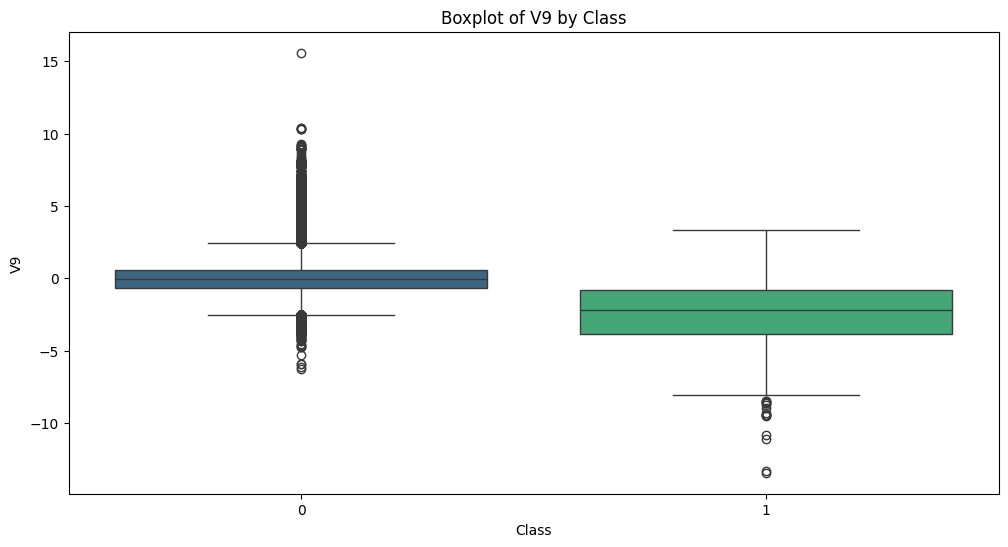

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


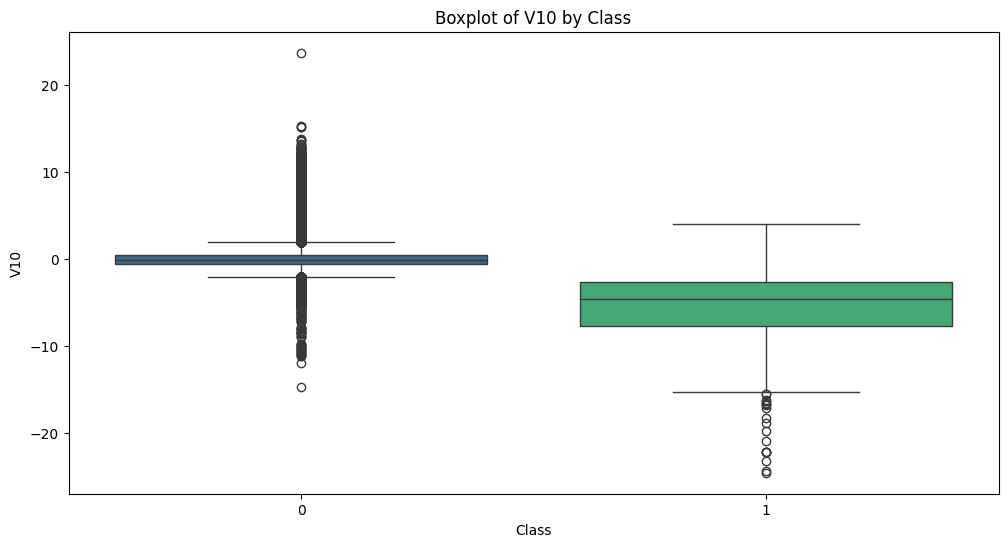

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


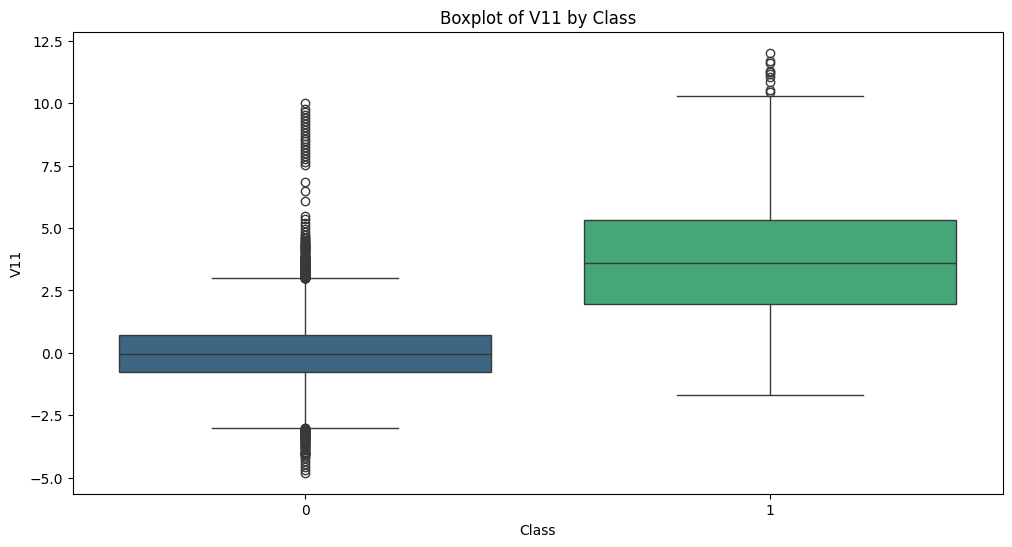

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


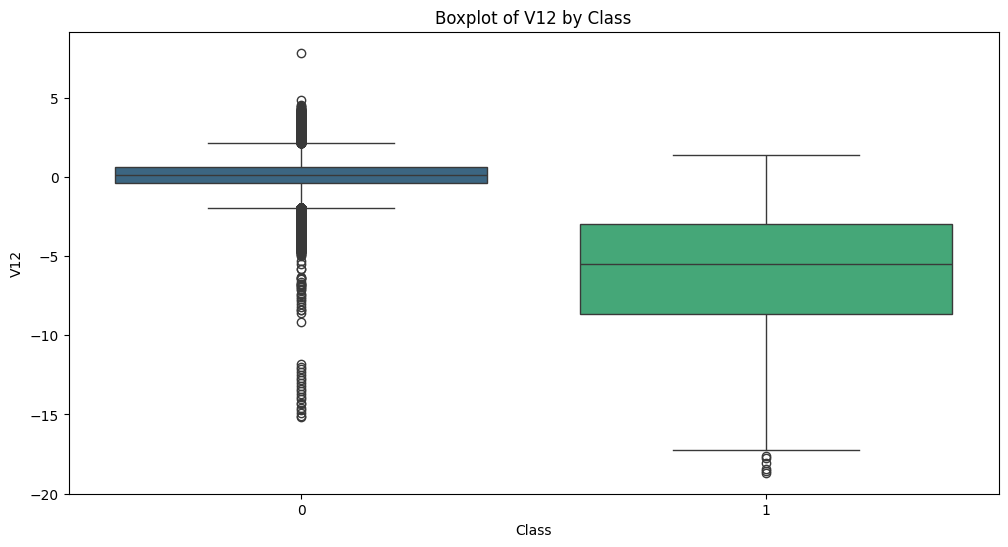

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


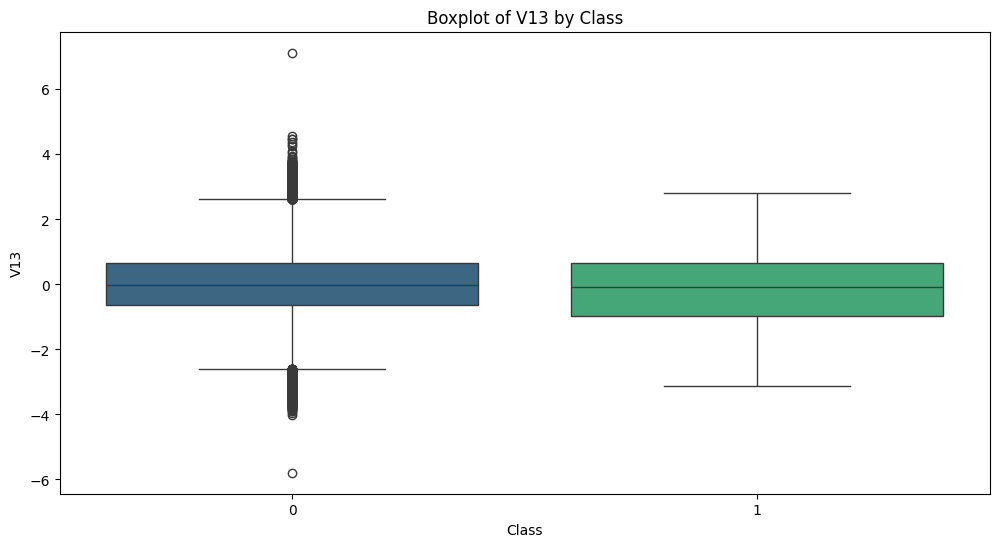

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


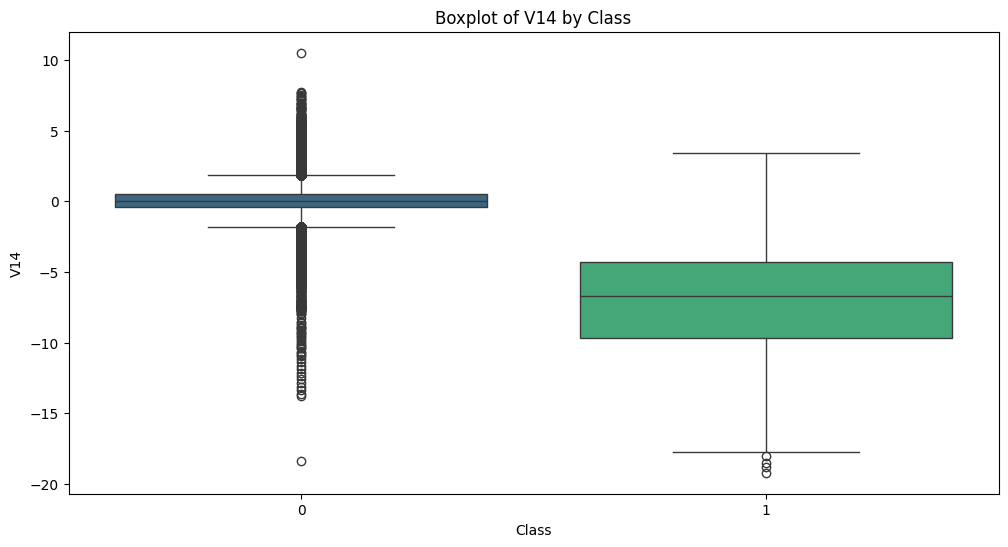

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


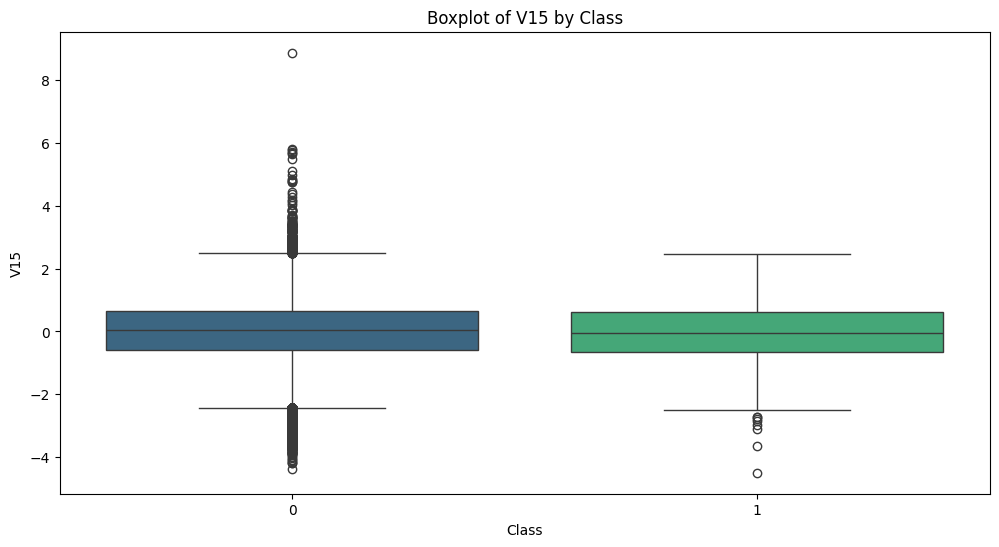

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


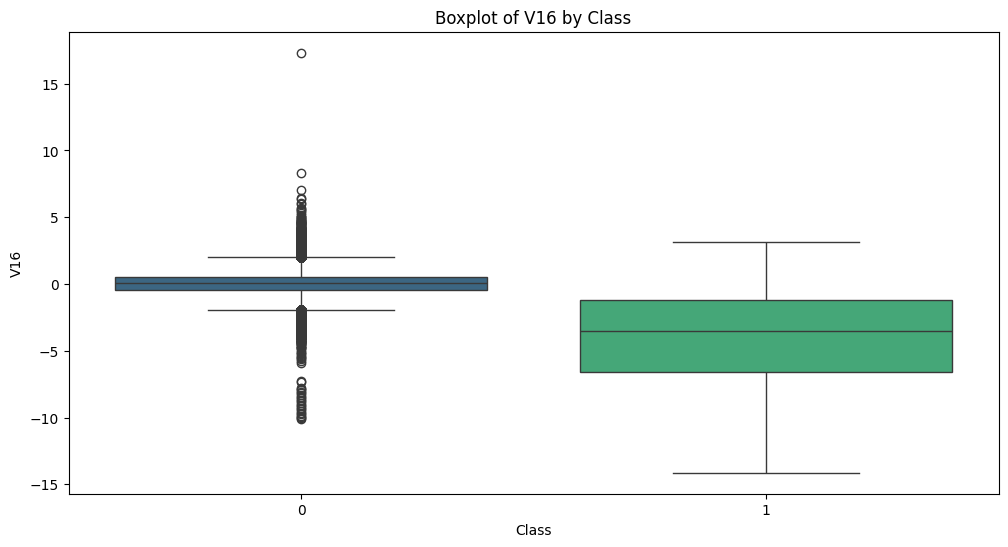

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


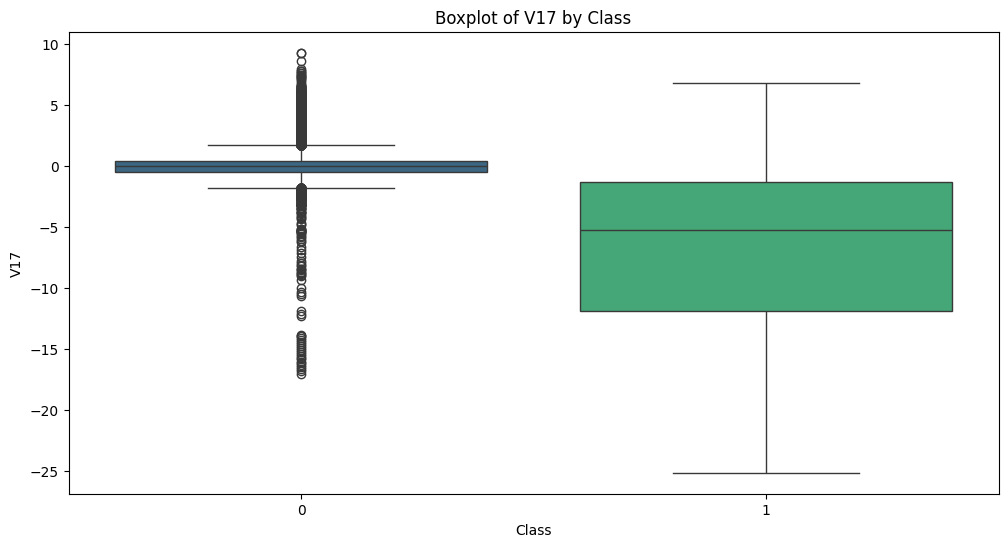

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


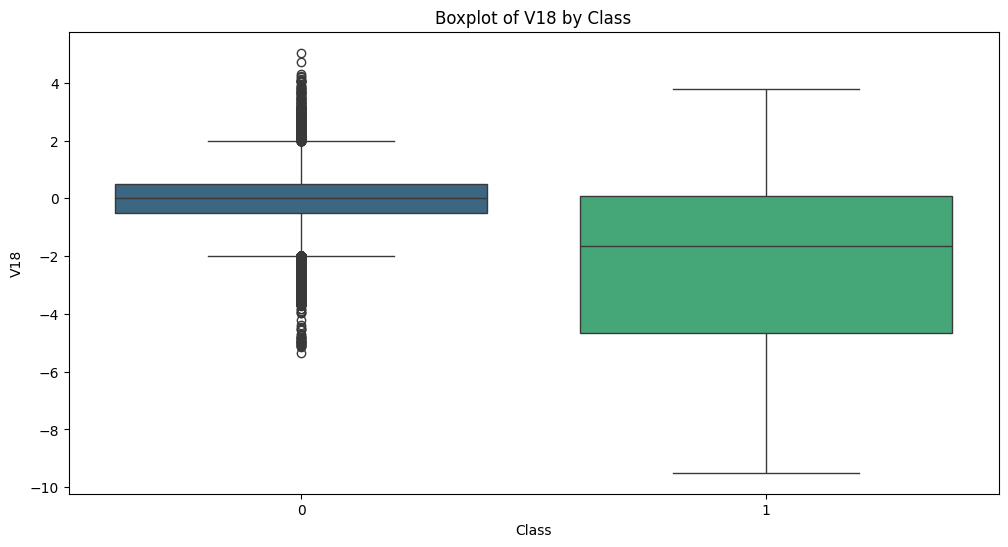

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


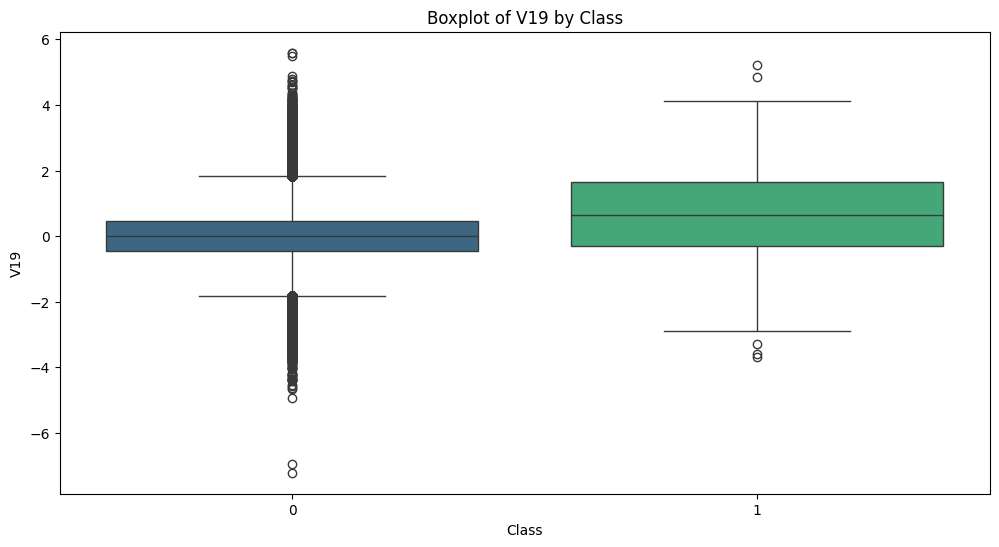

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


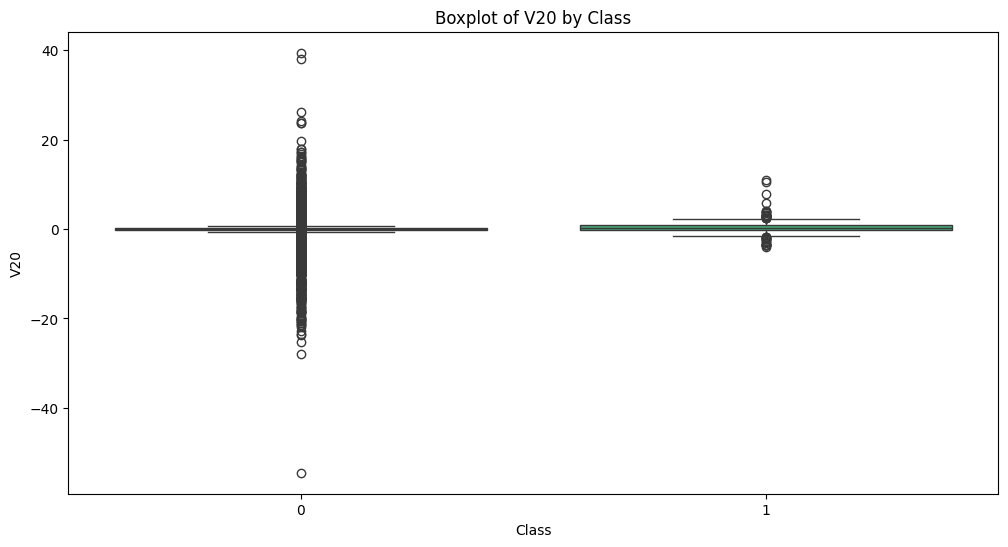

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


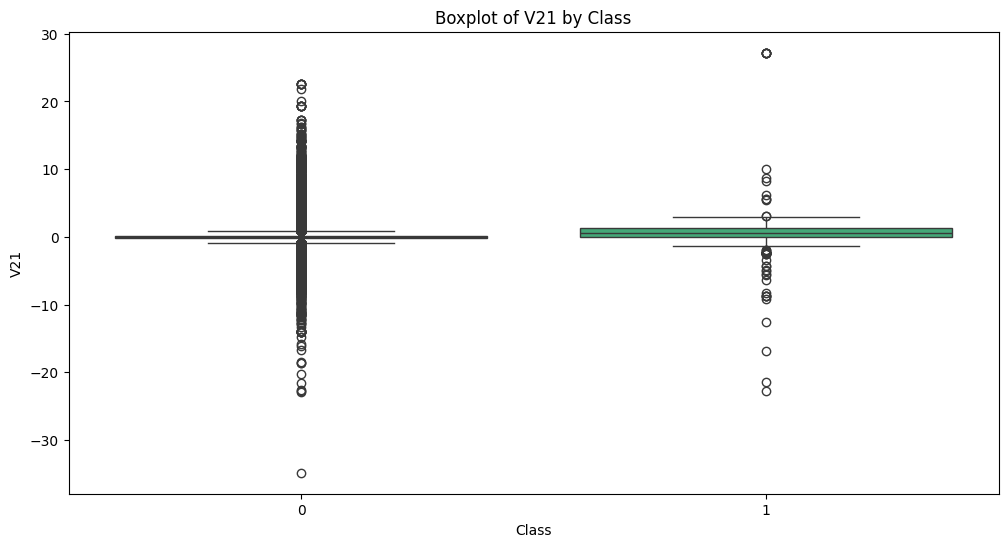

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


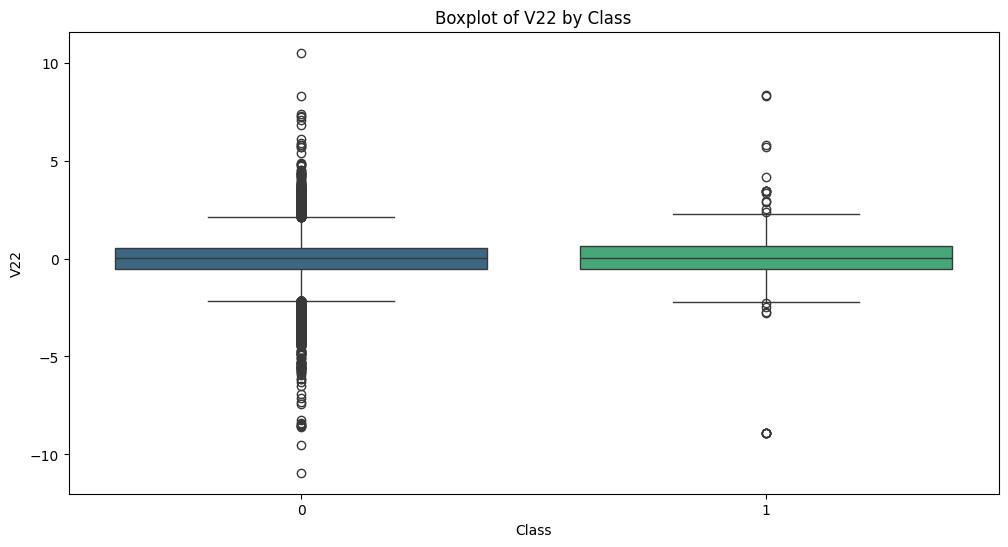

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


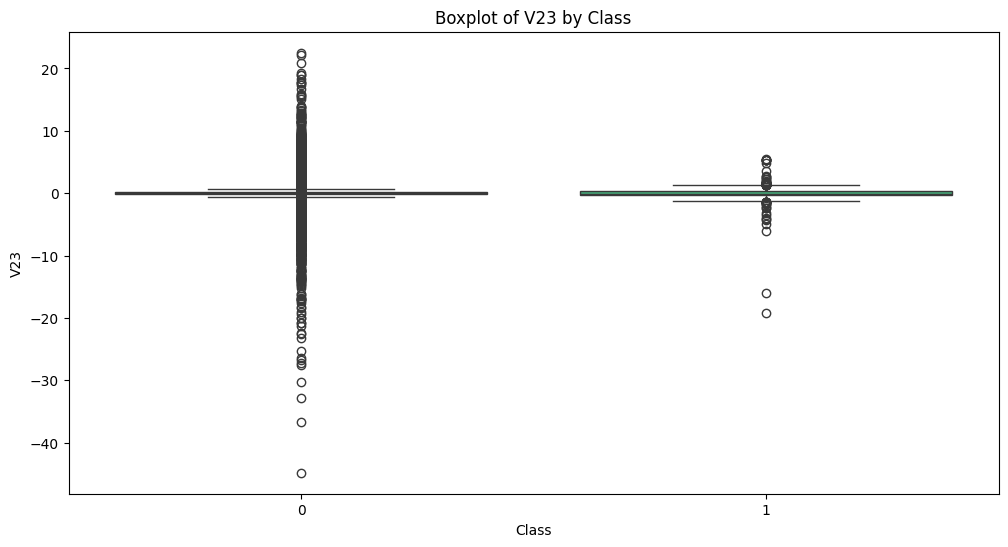

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


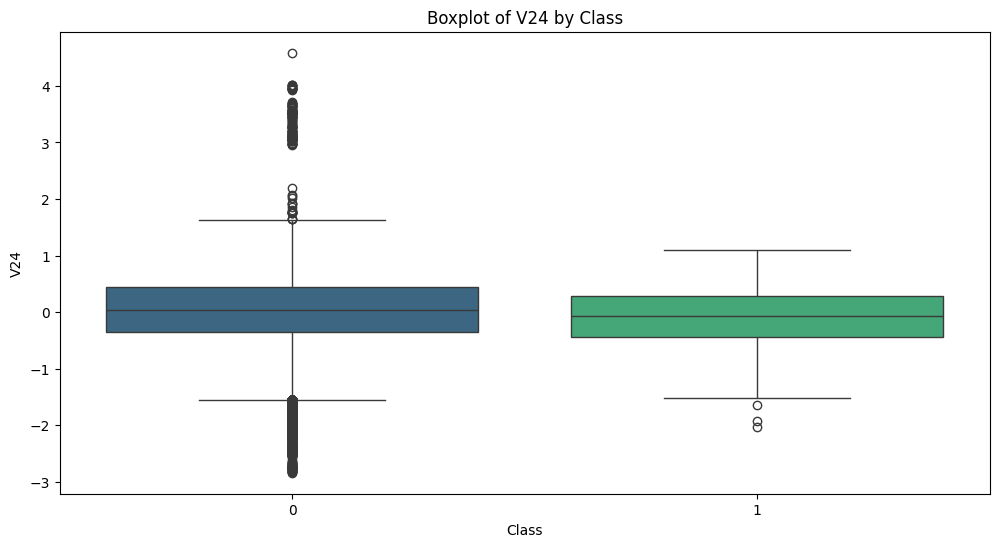

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


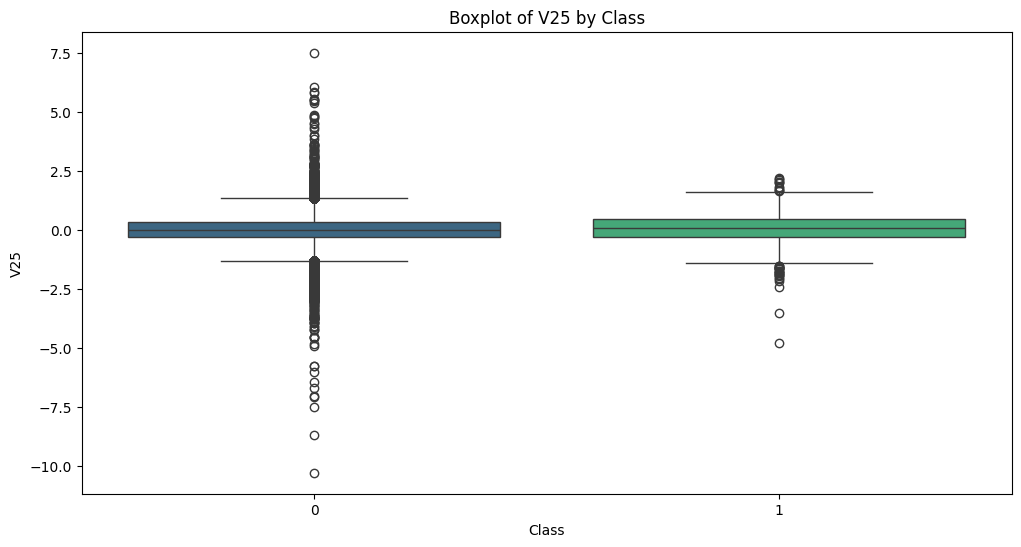

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


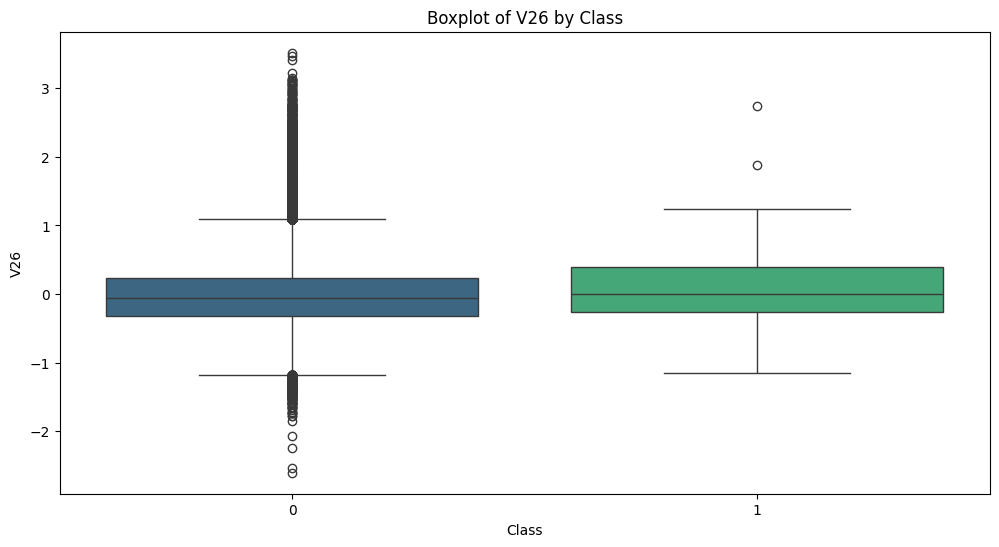

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


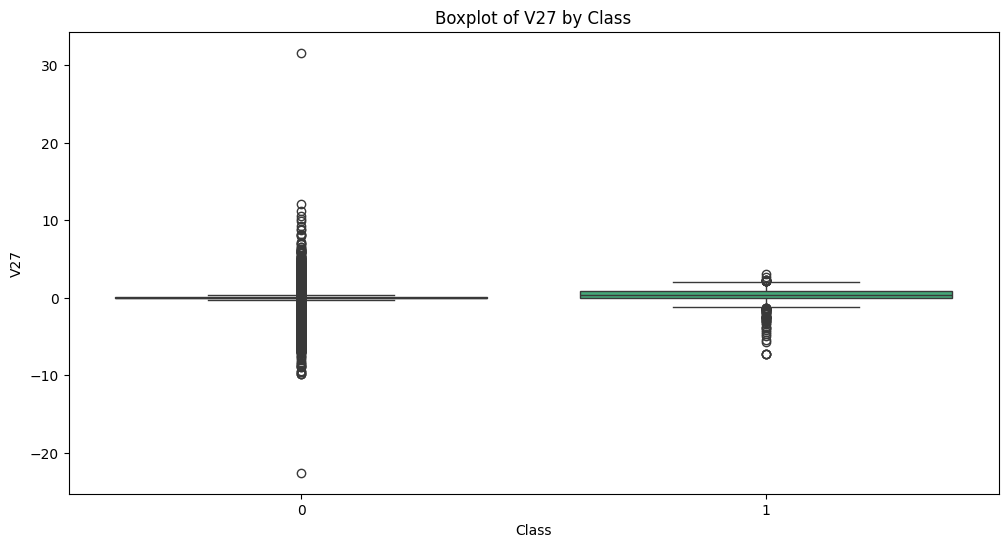

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


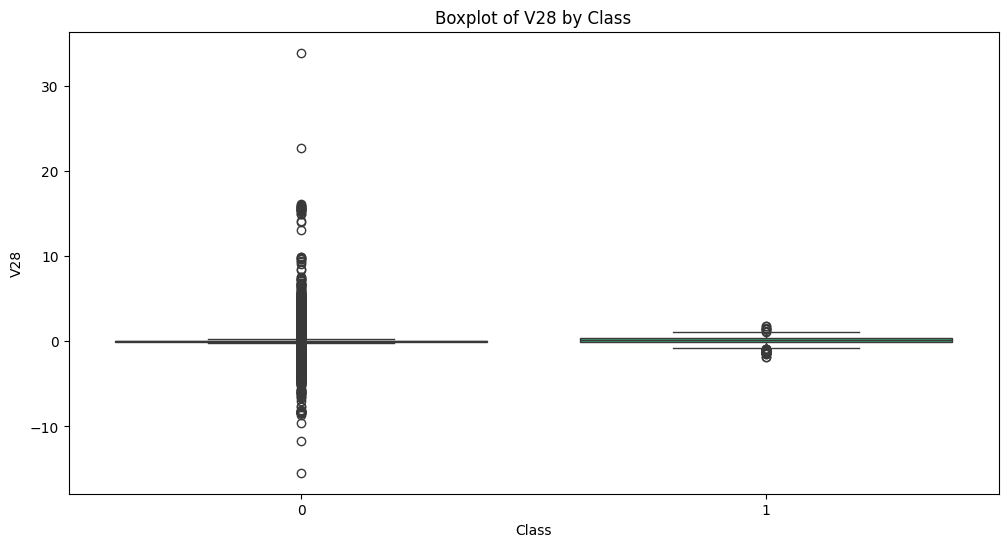

<ipython-input-24-36b6841888dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')


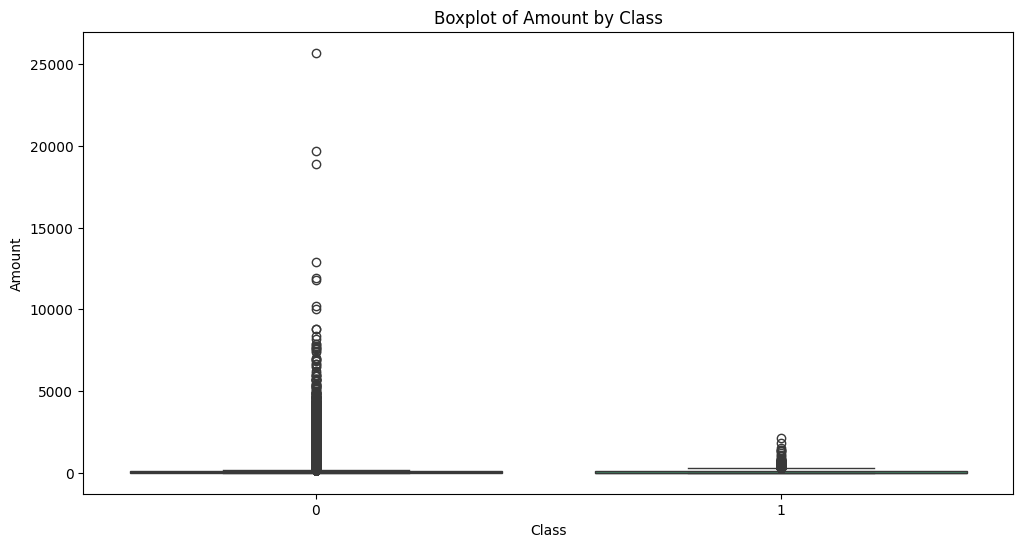

In [ ]:
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=target_column, y=feature, data=data, palette='viridis')
    plt.title(f'Boxplot of {feature} by {target_column}')
    plt.show()

In [ ]:
X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

print(X_train.shape , y_train.shape)

#Adham's Models and Related Plots


## **Neural Networks**

In [ ]:
len(np.unique(y_train))

2

### **Trial 1**

* I've Used 3 Hidden Layers with ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(256, activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=10,
#     batch_size=32,
#     verbose=1
# )

### **Trial 2**
* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score (0.99851)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(256, activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=25,
#     batch_size=32,
#     verbose=1
# )

### **Trial 3**
* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(256, activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 4**
* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=10,
#     batch_size=32,
#     verbose=1
# )

### **Trial 5**
* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score ()


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=25,
#     batch_size=32,
#     verbose=1
# )

### **Trial 6**
* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score ()


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 7**
* I've Used 3 Hidden Layers with (256 , 128 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(32, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 8**
* I've Used 3 Hidden Layers with (128 , 64 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(32, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 9**
* I've Used 3 Hidden Layers with (64 , 32 , 16)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(32, activation='relu'))
# modelAdam.add(Dense(16, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 10**
* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(24, activation='relu'))
# modelAdam.add(Dense(12, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

### **Trial 11**
* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50** => Via Early Stopping (Presence = 5)=> **37**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# early_stopping = EarlyStopping(
#     monitor='val_accuracy',
#     patience=5,
#     restore_best_weights=True
# )

# modelAdam = Sequential()
# modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(24, activation='relu'))
# modelAdam.add(Dense(12, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1,
#     callbacks=[early_stopping]
# )


'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

### **Trial 12**
* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50** => Via Early Stopping (Presence = 10)=> **22**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)
modelAdam = Sequential()
modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
modelAdam.add(Dense(24, activation='relu'))
modelAdam.add(Dense(12, activation='relu'))
modelAdam.add(Dense(2, activation='softmax'))

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = modelAdam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)


'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

In [ ]:
val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
val_f1 = f1_score(y_val, val_predictions, average='macro')
print(f"Validation F1 Score after training: {val_f1:.6f}")

if val_f1 < 1.000:
    print("Restoring final epoch weights to achieve F1 score of 1.000.")
    modelAdam.load_weights('final_epoch.weights.h5')
    val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
    val_f1 = f1_score(y_val, val_predictions, average='macro')
    print(f"Validation F1 Score after restoring final weights: {val_f1:.6f}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after training: 0.999701
Restoring final epoch weights to achieve F1 score of 1.000.
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after restoring final weights: 0.999613


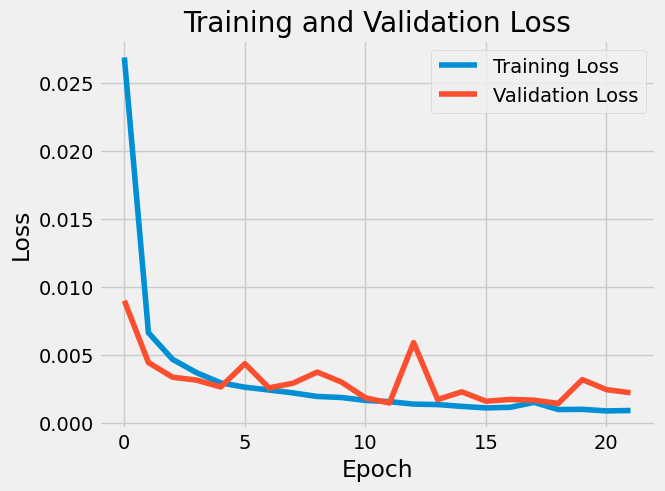

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

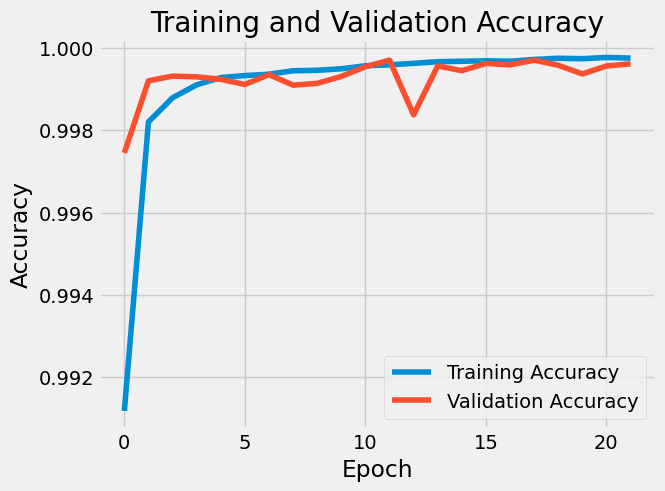

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

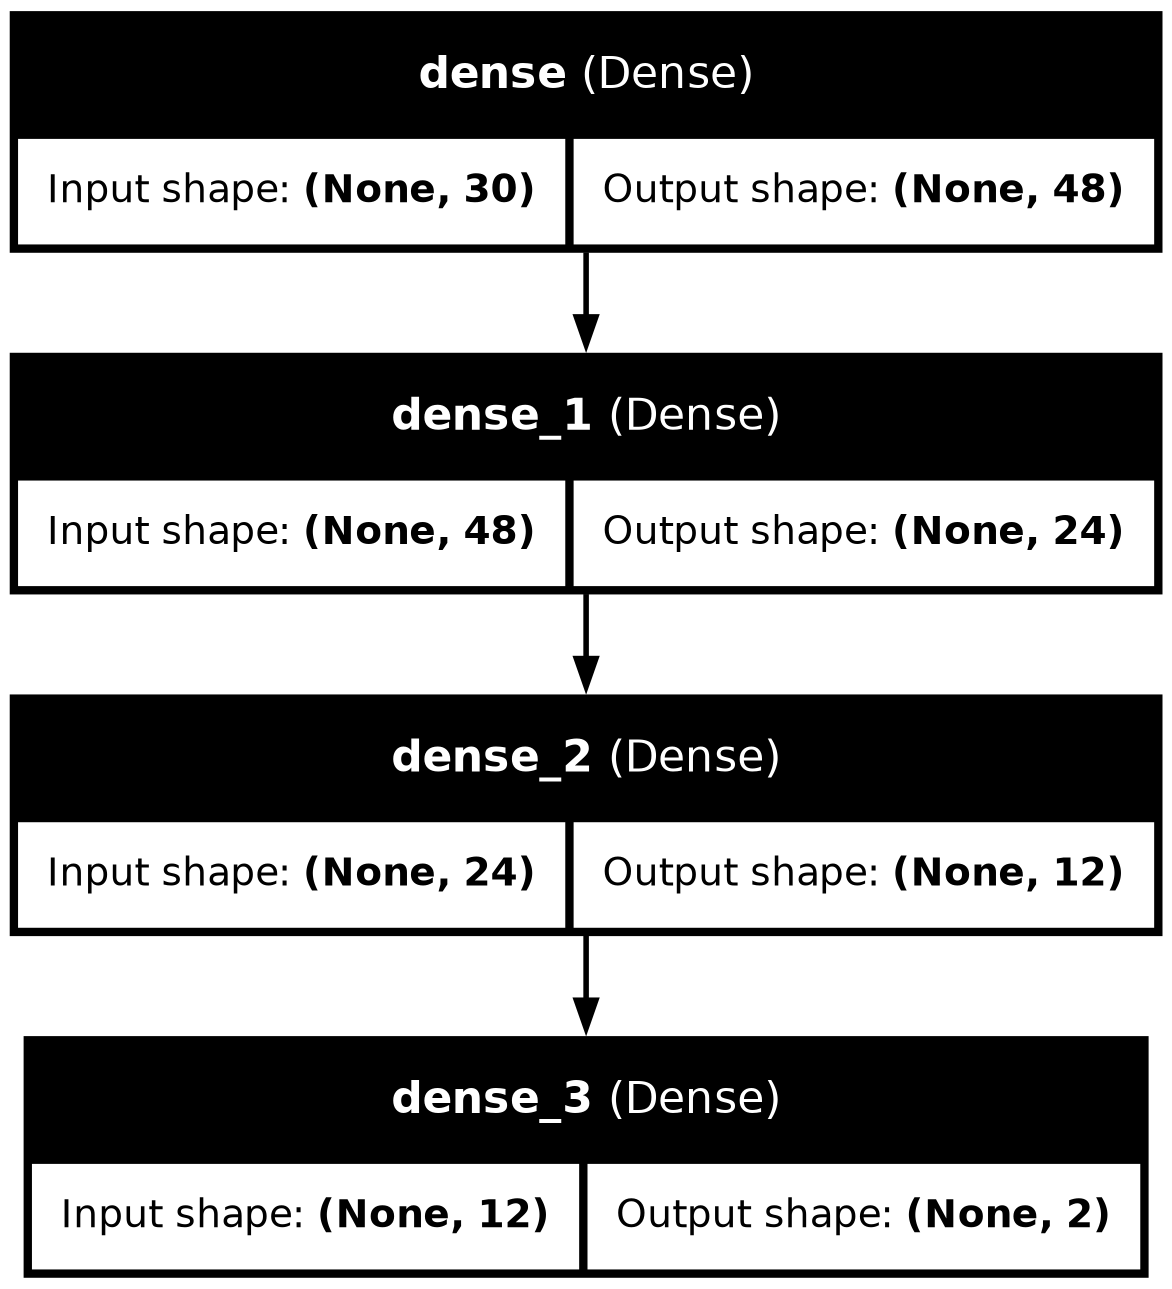

In [ ]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Final 3 Layers 22ep ADAM.csv", index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
modelAdam.save('G1 Task 2.keras')

In [ ]:
# !rm -rf /kaggle/working/*

#Youssef's Models and Related Plots

######Youssef Tarek


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  

<Figure size 1500x1000 with 0 Axes>

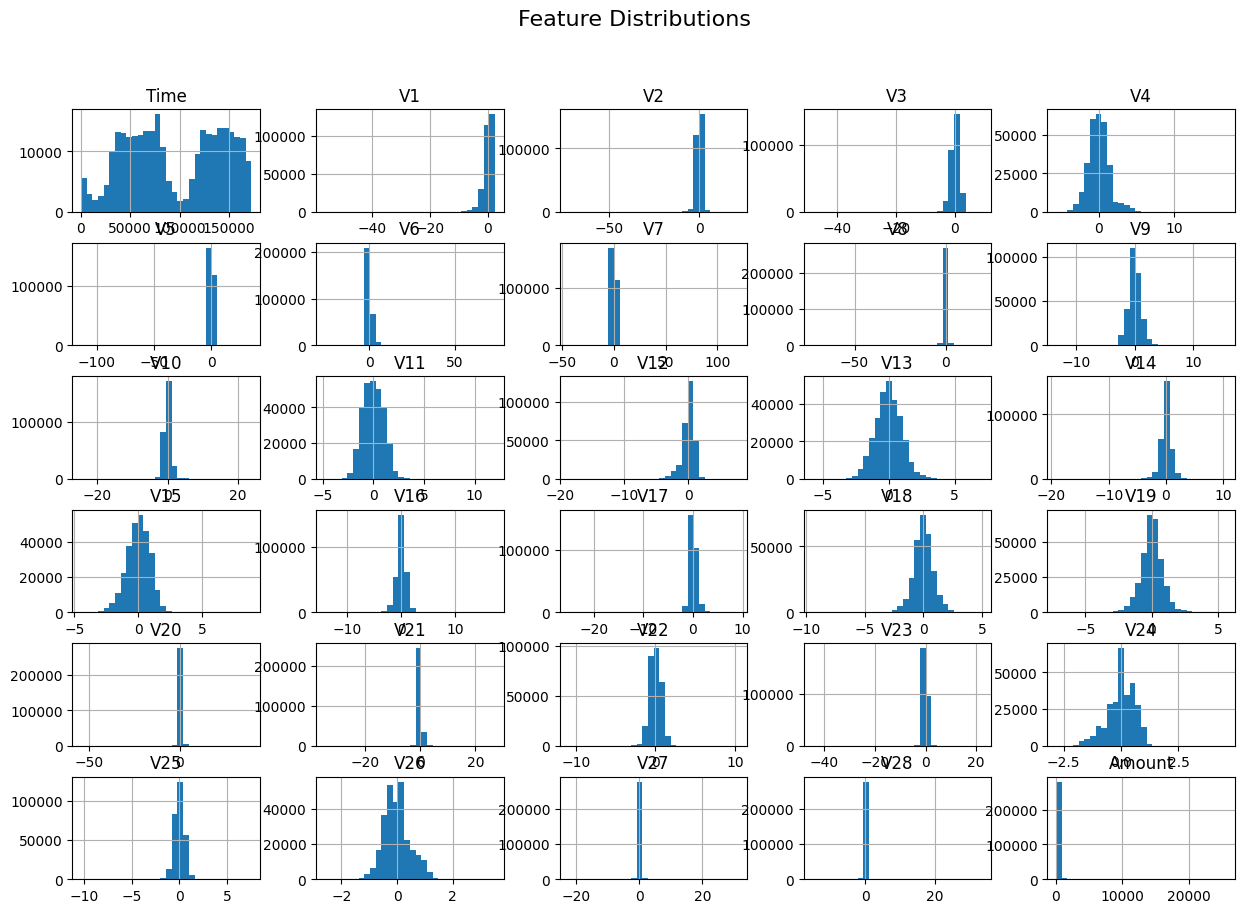


Number of Outliers Detected Using Z-Score (Threshold=3): 83598

Number of Outliers per Class:
Class
0    37372
1      444
Name: IsOutlier, dtype: int64

Percentage of Outliers per Class:
Class
0    13.144576
1    90.243902
dtype: float64

Number of Anomalies Detected by Isolation Forest:
Class
0    2560
1     289
Name: count, dtype: int64


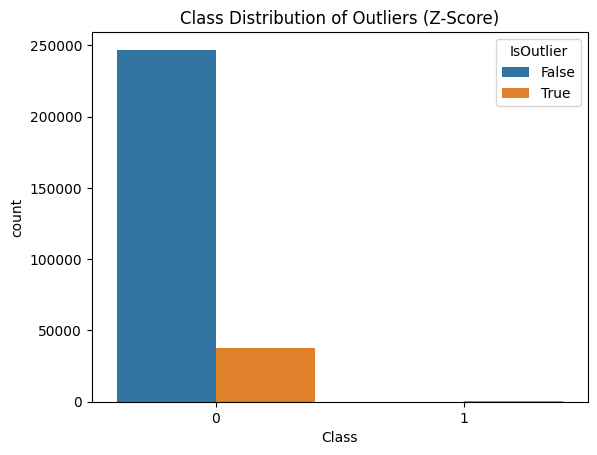

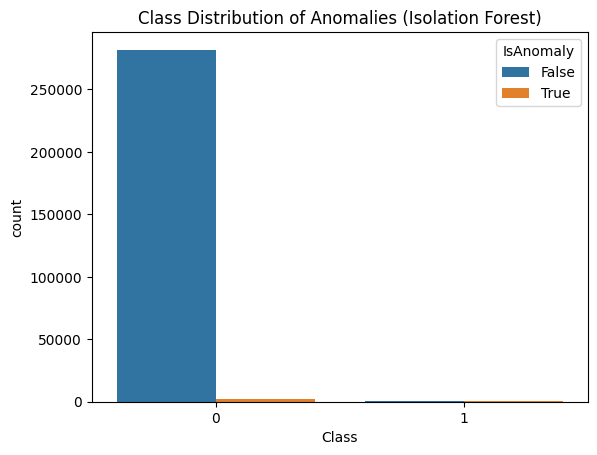


Before SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64

After SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:


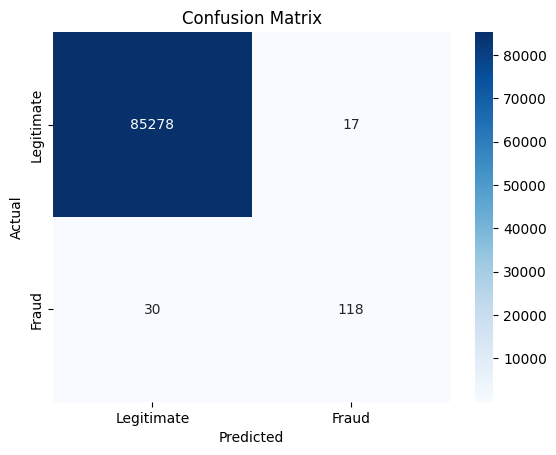


Model Metrics:
Accuracy: 99.94%
Precision: 87.41%
Recall: 79.73%
F1-Score: 83.39%
ROC-AUC Score: 94.93%


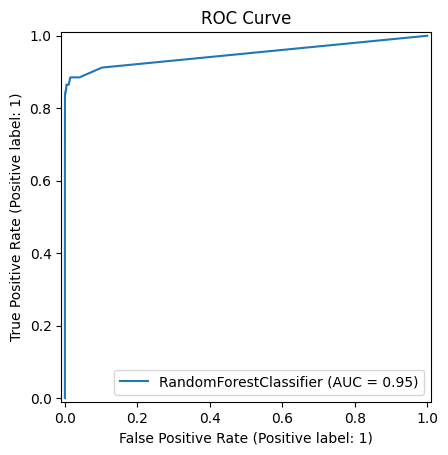

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

data.dropna(inplace=True)

print("\nMissing Values:")
print(data.isnull().sum())

print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nClass Distribution:")
print(data['Class'].value_counts())

plt.figure(figsize=(15, 10))
data.iloc[:, :-1].hist(bins=30, figsize=(15, 10), layout=(6, 5))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            z_scores = (df[col] - df[col].mean()) / df[col].std()
            outliers[col] = z_scores.abs() > threshold
    return pd.DataFrame(outliers)

threshold = 3
outliers_zscore = detect_outliers_zscore(data.iloc[:, :-1], threshold)
outliers_count = outliers_zscore.sum().sum()

print(f"\nNumber of Outliers Detected Using Z-Score (Threshold={threshold}): {outliers_count}")

data['IsOutlier'] = outliers_zscore.any(axis=1)
outliers_per_class = data.groupby('Class')['IsOutlier'].sum()

print("\nNumber of Outliers per Class:")
print(outliers_per_class)

total_per_class = data['Class'].value_counts()
percentage_outliers = (outliers_per_class / total_per_class) * 100

print("\nPercentage of Outliers per Class:")
print(percentage_outliers)

isolation_forest = IsolationForest(contamination=0.01, random_state=42)
data['AnomalyScore'] = isolation_forest.fit_predict(data.iloc[:, :-2])
data['IsAnomaly'] = data['AnomalyScore'] == -1

anomalies = data[data['IsAnomaly']]
anomalies_per_class = anomalies['Class'].value_counts()

print("\nNumber of Anomalies Detected by Isolation Forest:")
print(anomalies_per_class)

sns.countplot(x='Class', hue='IsOutlier', data=data)
plt.title('Class Distribution of Outliers (Z-Score)')
plt.show()

sns.countplot(x='Class', hue='IsAnomaly', data=data)
plt.title('Class Distribution of Anomalies (Isolation Forest)')
plt.show()

data.drop(columns=['IsOutlier', 'AnomalyScore', 'IsAnomaly'], inplace=True)

X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nBefore SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nModel Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc * 100:.2f}%")

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

#Comparing All Comments performance